# Machine Learning - Notebook Classification 
#### Valentine Michelet - IODAA

[Notebook Classification - Earthquake_alert_balanced_dataset](https://www.kaggle.com/datasets/ahmeduzaki/earthquake-alert-prediction-dataset)

# Présentation de la base données 

La base de données, "Earthquake_alert_balanced_dataset", présente six colonnes.

- La magnitude, c'est à dire puissance du séisme, mesurée sur l’échelle de Richter.

- La profondeur (depht), c’est-à-dire à quelle distance sous la surface de la terre le séisme commence à se produire.

- La cdi (Community Determined Intensity), il s'agit de la mesure de l’intensité du séisme ressentie par la population. Elle est basée sur des témoignages. Cette mesure reflète donc l’impact subjectif du séisme sur la population.

- La mmi (Modified Mercalli Intensity), il s'agit de la mesure instrumentale (non subjective) de l’intensité du séisme. Elle est basée sur des capteurs sismiques et modèles géophysiques. 

- Le sig (significance), il s'agit d'un score global de “signification” du séisme. Il combine plusieurs facteurs dont la magnitude, la mmi et la cdi.



- L'alert, il s'agit de la catégorie d’alerte associée au séisme. C’est une variable qualitative avec 4 niveaux :
    - Green → pas de danger
    - Yellow → impact modéré possible
    - Orange → impact fort attendu
    - Red → alerte maximale, séisme majeur


Dans ce Notebook, nous allons essayer de prédire à quelle classe d'alerte appartiennent les séismes en utilisant divers modèles et en améliorant leurs performances.




#  I- Visualisation des données

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [11]:
#Importation des données
filename = "earthquake_alert_balanced_dataset.csv"
data = pd.read_csv(filename)

#Visualisation des données
print(data)

#Conversion en array
data_array=data.values


      magnitude  depth  cdi  mmi    sig   alert
0          7.00   14.0  8.0  7.0    0.0   green
1          6.90   25.0  4.0  4.0  -33.0   green
2          7.00  579.0  3.0  3.0  -13.0   green
3          7.30   37.0  5.0  5.0   65.0   green
4          6.60  624.0  0.0  2.0  -98.0   green
...         ...    ...  ...  ...    ...     ...
1295       6.87   11.0  9.0  7.0   13.0  yellow
1296       7.85   93.0  8.0  6.0  -51.0  yellow
1297       7.48  142.0  7.0  6.0  120.0  yellow
1298       7.04   51.0  7.0  6.0 -115.0  yellow
1299       6.50    9.0  9.0  8.0  -29.0  yellow

[1300 rows x 6 columns]


In [12]:
#Information sur les colonnes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [13]:
#Information descriptive sur les colonnes
data.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


## Histogramme sur la répartition des alertes

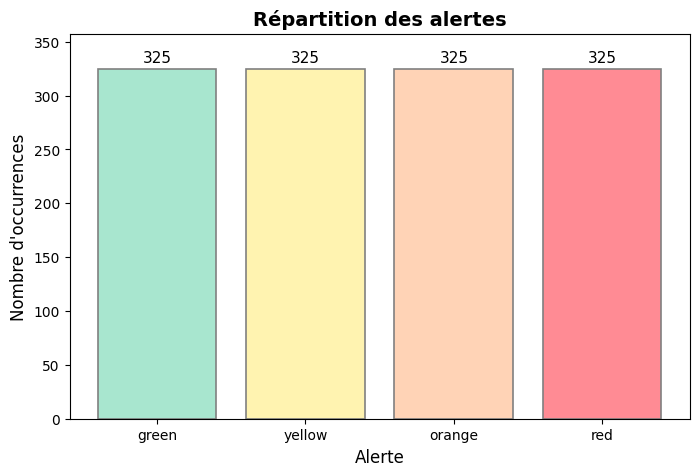

In [14]:
colors_pastel = {
    'green': '#a8e6cf',
    'yellow': '#fff3b0',
    'orange': '#ffd3b6',
    'red': '#ff8b94'
}

# Comptage des alertes
alert_counts = data['alert'].value_counts()

# Création du barplot
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(
    alert_counts.index,
    alert_counts.values,
    color=[colors_pastel.get(alert, '#d3d3d3') for alert in alert_counts.index],
    edgecolor='grey',    
    linewidth=1.2
)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + max(alert_counts.values)*0.01, 
        f'{int(height)}', 
        ha='center', 
        va='bottom',
        fontsize=11
    )

# Titres et labels
ax.set_title("Répartition des alertes", fontsize=14, weight='bold')
ax.set_xlabel("Alerte", fontsize=12)
ax.set_ylabel("Nombre d'occurrences", fontsize=12)
ax.set_ylim(0, max(alert_counts.values)*1.1)
plt.xticks(rotation=0)
plt.show()


### Notes
Le jeu de données semble très équilibré en ce qui concerne les différents types d'alerte puisqu'il y a autant d'occurrence pour chaque classe.

## Distribution des descripteurs 

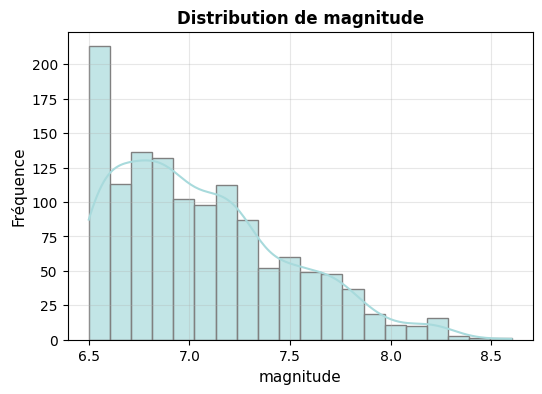

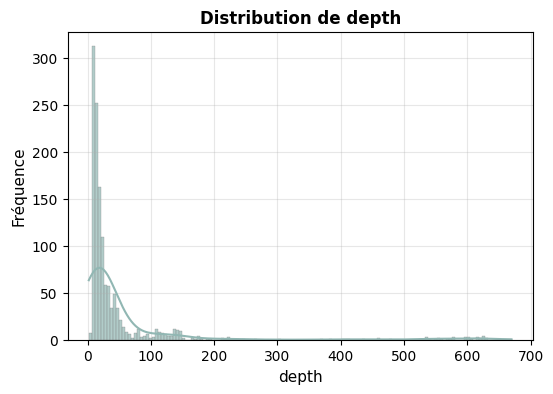

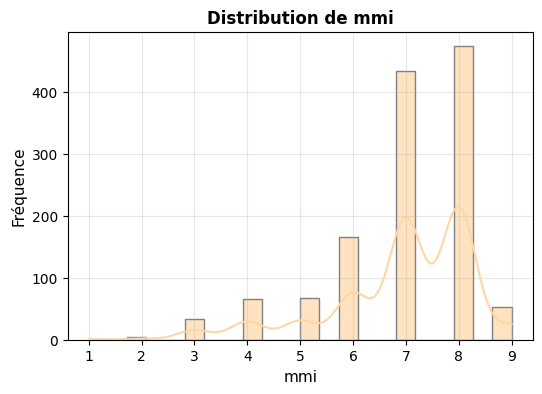

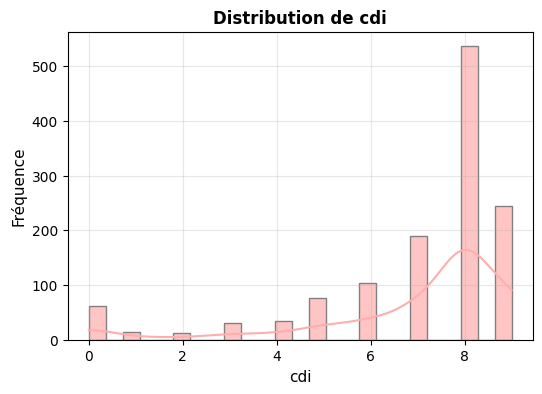

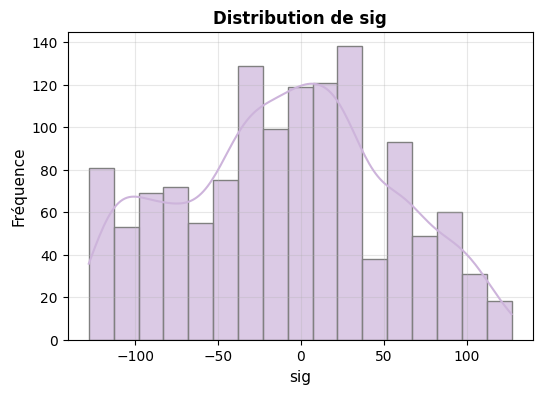

In [15]:
cols = ['magnitude', 'depth', 'mmi', 'cdi', 'sig']
colors = ['#a8dadc', '#91b7b3', '#ffd6a5', '#ffadad', '#cdb4db']  

for i, col in enumerate(cols):
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color=colors[i], edgecolor='gray', alpha=0.7)
    plt.title(f"Distribution de {col}", fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Fréquence", fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


### Notes

L’histogramme de la magnitude révèle une concentration importante des valeurs autour de 6,5 à 7,2 et quelques séismes au-delà de 8. Cette distribution suggère que la plupart des séismes étudiés sont d'intensité modérée.

L’histogramme de la profondeur (depth) montre une distribution très asymétrique, fortement concentrée sur les faibles profondeurs (en dessous de 50 km). Cela indique que la majorité des séismes étudiés sont superficiels, tandis que les séismes profonds restent marginaux. 

Pour la variable MMI, nous observons plusieurs pics autour des valeurs 6, 7 et 8. Cela traduit l’existence de plusieurs sous-groupes d’événements selon leur intensité ressentie, correspondant sans doute à différents niveaux d’alerte. De manière analogue, la variable CDI présente une distribution similaire, concentrée sur des valeurs élevées.

Enfin, la variable Sig présente une distribution quasi symétrique et centrée, sans décalage ni concentration marquée. 

## Visualisation des Boxplots

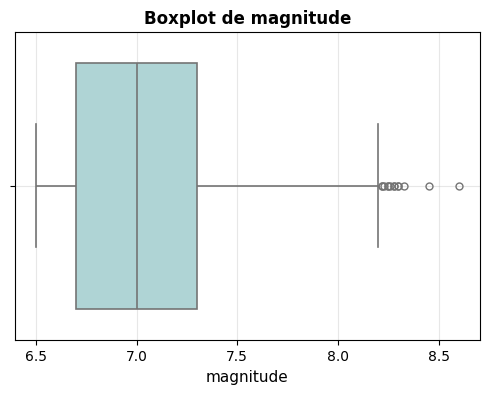

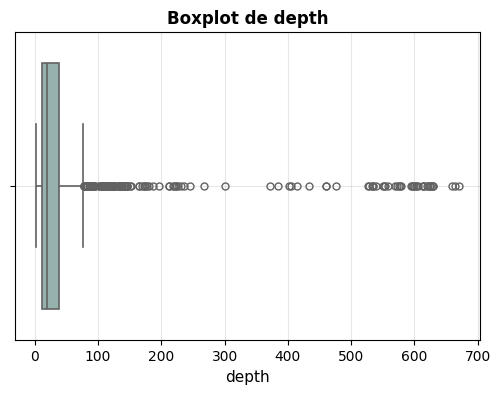

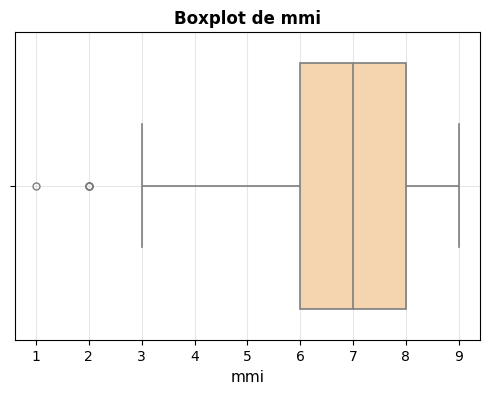

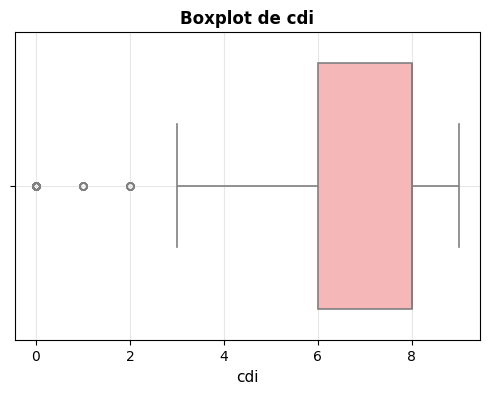

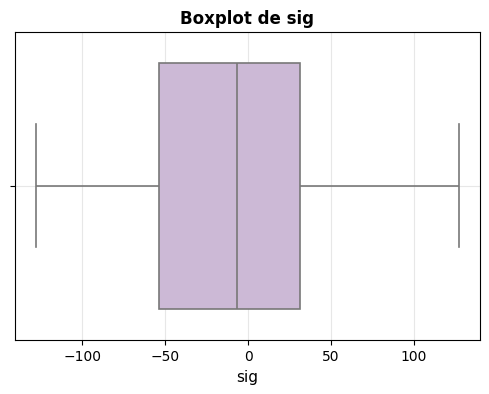

In [16]:
cols = ['magnitude', 'depth', 'mmi', 'cdi', 'sig']
colors = ['#a8dadc', '#91b7b3', '#ffd6a5', '#ffadad', '#cdb4db']  

for i, col in enumerate(cols):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color=colors[i], fliersize=5, linewidth=1.2)
    plt.title(f"Boxplot de {col}", fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


### Notes

Les boxplots confirment et affinent les observations précédentes.

Le boxplot de la magnitude montre une distribution relativement homogène, centrée autour de 7, avec quelques valeurs extrêmes au-delà de 8.

Celui de la profondeur met en évidence une médiane très basse et de nombreux points aberrants vers les valeurs élevées, ce qui traduit la prédominance des séismes superficiels et la présence occasionnelle de séismes profonds. 

Les boxplots du MMI et du CDI révèlent des médianes élevées (autour de 7) et des étendues réduites, ce qui traduit une intensité ressentie globalement forte pour la majorité des événements. 

Enfin, le boxplot du Sig est centré et dépourvu d’outliers, confirmant une distribution équilibrée. Cela montre que cette variable est stable et peu susceptible d’introduire du bruit dans le modèle.

## Visualisation des corrélations

### LabelEncoding

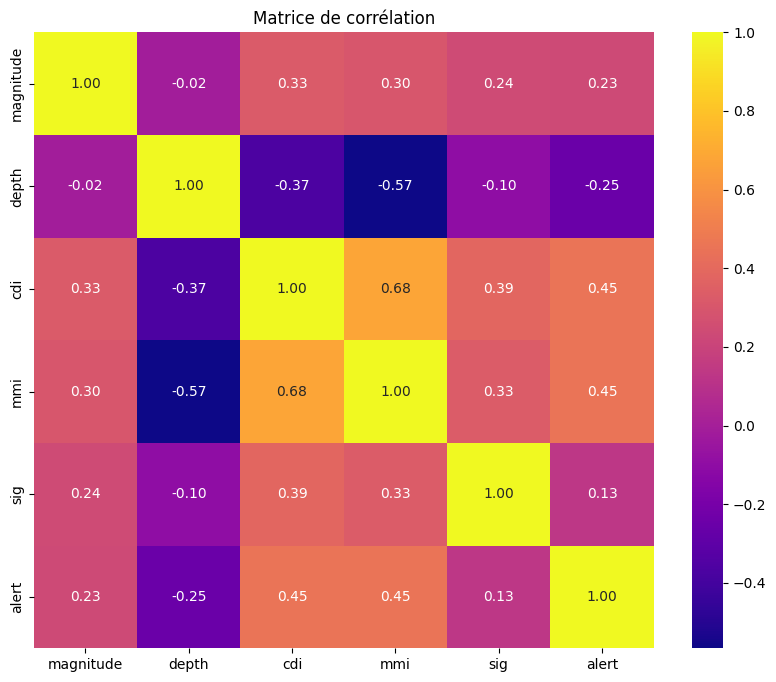

Matrice de corrélation pour alert:
alert        1.000000
mmi          0.452922
cdi          0.449327
magnitude    0.229037
sig          0.130602
depth       -0.251190
Name: alert, dtype: float64


In [17]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['alert']
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi','sig']
data_encoded = data.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

cols_for_corr = numerical_cols + categorical_cols 
corr_matrix = data_encoded[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma")
plt.title('Matrice de corrélation')
plt.show()
print("Matrice de corrélation pour alert:")
print(corr_matrix['alert'].sort_values(ascending=False))

### Notes
Toutes les variables sont plus ou moins corrélées à l'alerte. 

mmi (0.452) → corrélation positive :
Plus la valeur mmi augmente, plus alert a tendance à augmenter.
Cette variable est potentiellement informative pour prédire alert.

cdi (0.449) → très proche de mmi, même type de lien.
cdi et mmi sont souvent liées à l’intensité ressentie d’un séisme, donc logique.

magnitude (0.23) → corrélation positive moins élevée.
La magnitude influence un peu alert, mais pas directement.

sig (0.13) → corrélation faible.
Influence légère.

depth (-0.25) → corrélation faible négative.
Plus la profondeur est grande, plus alert diminue (phénomène logique : séisme profond = moins ressenti).

Nous allons par la suite utiliser le OneHotEncoding pour visualiser plus en détail les corrélations de chaque descripteurs pour chaque classe d'alerte spécifiquement.

### OneHotEncoding

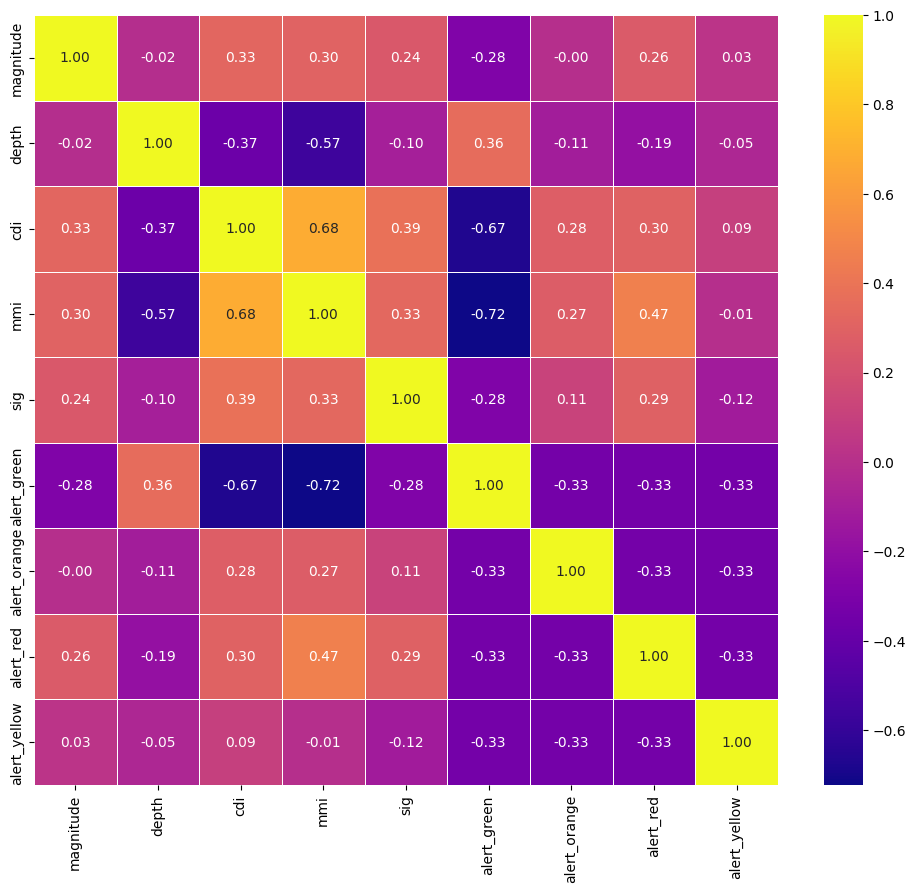

Corrélation avec les différentes catégories de 'alert' :

alert_green :
alert_green     1.000000
depth           0.355495
magnitude      -0.279434
sig            -0.284979
alert_orange   -0.333333
alert_red      -0.333333
alert_yellow   -0.333333
cdi            -0.670722
mmi            -0.723111
Name: alert_green, dtype: float64

alert_orange :
alert_orange    1.000000
cdi             0.276087
mmi             0.267272
sig             0.113304
magnitude      -0.004100
depth          -0.113690
alert_green    -0.333333
alert_red      -0.333333
alert_yellow   -0.333333
Name: alert_orange, dtype: float64

alert_red :
alert_red       1.000000
mmi             0.465349
cdi             0.299836
sig             0.291117
magnitude       0.255130
depth          -0.190533
alert_green    -0.333333
alert_yellow   -0.333333
alert_orange   -0.333333
Name: alert_red, dtype: float64

alert_yellow :
alert_yellow    1.000000
cdi             0.094800
magnitude       0.028404
mmi            -0.009510
depth  

In [18]:
from sklearn.preprocessing import OneHotEncoder
# Colonnes catégorielles et numériques
categorical_cols = ['alert']
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi','sig']

# OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
X_cat = enc.fit_transform(data[categorical_cols])


column_names = []
for i, cat in enumerate(enc.categories_):
    column_names.extend([f"{categorical_cols[i]}_{c}" for c in cat])


X_cat_df = pd.DataFrame(X_cat, columns=column_names)


data_final = pd.concat([data[numerical_cols], X_cat_df], axis=1)


corr_matrix = data_final.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma", linewidths=0.5)
plt.show()


# Afficher les corrélations de chaque catégorie d'alert avec les autres variables
alert_cols = [col for col in corr_matrix.columns if col.startswith('alert_')]

print("Corrélation avec les différentes catégories de 'alert' :")
for col in alert_cols:
    print(f"\n{col} :")
    print(corr_matrix[col].sort_values(ascending=False))


Pour chaque classe d'alerte, les corrélations sont logiques: 

- Alert_green:
    - Corrélation positive avec depth (0.35) → les séismes profonds sont moins ressentis à la surface donc font moins de dégâts.
    - Corrélation négative avec mmi (-0.72) et cdi (-0.67) → quand l’intensité ressentie est faible, l'alerte est plus souvent verte.

- Alert_red
    - Corrélation positive avec mmi (0.46), cdi (0.30), sig (0.29), magnitude (0.25) → plus la magnitude et l’intensité augmentent, plus le séisme et violent et donc l'alerte est rouge.
    - Corrélation négative avec depth → les séismes profonds sont moins ressentis à la surface, ils font moins de dégâts.

- Alert_orange / Alert_yellow
    - Les corrélations sont plus faibles surtout pour la classe jaune, il s'agit de niveaux d'alertes intermédiaires, donc les effets sont plus nuancés.

# II- Prédiction du type d'alerte 

Nous cherchons à prédire le type d'alerte auquel appartient tel ou tel séisme. Pour cela nous allons utiliser deux types de classfications et plusieurs types de modèles que nous essayerons d'améliorer. 

Pour les deux types de classifications, nous allons tester la classification multiclasse "directe" directement réalisée par les modèles et une classification "hiérachique" c'est à dire, prédire vert contre tous puis jaune contre orange et rouge et enfin orange contre rouge.

# A- Premiers essais

## 1- Essais avec la Classification multiclasse directe

In [19]:
#Génération des descripteurs
X = data.drop(columns='alert')

#Génération de la variable cible
y=data['alert']


In [20]:
#Séparation de l'ensemble de test et d'apprentissage

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size= 0.80)

In [21]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

### Mise en place des modèles

#### Test de la robustesse des modèles

In [22]:
#Définition de la fonction pour effectuer une validation croisée
from sklearn.model_selection import cross_val_score
def visualisation_cross_val(model, X, y, model_name, cv=5): 
    sc = cross_val_score( model, X, y, cv = cv)
    print("___________________________")
    print(f"modèle de référence : {model_name} : {sc}")
    print( "moyenne", sc.mean())
    return sc

In [23]:
#Application de la fonction ci-dessus à différents modèles

#SVC
from sklearn.svm import LinearSVC
model_LSVC = LinearSVC(random_state=42)
sc_LSVC = visualisation_cross_val(model_LSVC, X_train_scaled, y_train, "LinearSVC")

#logreg
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(max_iter=10000)
sc_logreg = visualisation_cross_val(model_logreg, X_train_scaled, y_train, "LogisticRegression")

#RFC
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(random_state=42)
sc_RFC = visualisation_cross_val(model_RFC, X_train, y_train, "RandomForestClassifier")


#catboost
import catboost as cgb
model_Catboost = cgb.CatBoostClassifier(random_seed=42, verbose=0)
sc_catboost = visualisation_cross_val(model_Catboost, X_train, y_train, "Catboost")


#xgboost
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
from xgboost import XGBClassifier
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
sc_xgb = visualisation_cross_val(model_xgb, X_train, y_train_enc, "XGBClassifier")


___________________________
modèle de référence : LinearSVC : [0.64903846 0.67307692 0.64903846 0.61538462 0.65384615]
moyenne 0.6480769230769231
___________________________
modèle de référence : LogisticRegression : [0.65865385 0.68269231 0.625      0.67307692 0.61057692]
moyenne 0.65
___________________________
modèle de référence : RandomForestClassifier : [0.875      0.88942308 0.90384615 0.91826923 0.91346154]
moyenne 0.9
___________________________
modèle de référence : Catboost : [0.88942308 0.91826923 0.88942308 0.92788462 0.91346154]
moyenne 0.9076923076923077
___________________________
modèle de référence : XGBClassifier : [0.89903846 0.87019231 0.875      0.92307692 0.89903846]
moyenne 0.8932692307692308


### Notes 

La performance des modèles testés est robuste puisque les résultats des 5 validations croisées restent dans le même ordre de grandeur. De plus, les modèles basés sur les arbres et le boosting (RandomForest, CatBoost, XGBoost) surpassent nettement les modèles linéaires (LinearSVC, LogisticRegression), avec des scores moyens autour de 0.9. 

### Test des modèles sur les ensembles de test

In [24]:
# Définition de la fonction pour avoir la matrice de confusion et l'accuracy score des modèles sur l'ensemble de test

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def evalution_data_test(model, X_train, X_test, y_train, y_test, model_name, le=None): 
    # Entraînement
    model.fit(X_train, y_train)
    # Prédiction
    y_pred = model.predict(X_test)

    # Score 
    score = model.score(X_test, y_test)

    # Visualisation
    print("_____________________________________________")
    print(f'Essai sur échantillon de test {model_name}')
    print("Score =", score)
    
    # Préparation pour la matrice de confusion
    if le is not None:
        y_pred_disp = le.inverse_transform(y_pred)
        y_test_disp = le.inverse_transform(y_test)
    else:
        y_pred_disp = y_pred
        y_test_disp = y_test
   
    # Matrice de confusion
    labels_order = ['green','yellow','orange','red']
    cm = confusion_matrix(y_test_disp, y_pred_disp, labels=labels_order)
    
    print("_____\nClassification report")
    print(classification_report(y_test_disp, y_pred_disp, labels=labels_order))

    print('Confusion matrice')
    print(cm)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',
                xticklabels=labels_order,
                yticklabels=labels_order)
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.title("Matrice de confusion")
    plt.show()

    # Retour du score
    return score

_____________________________________________
Essai sur échantillon de test LinearSVC
Score = 0.6538461538461539
_____
Classification report
              precision    recall  f1-score   support

       green       0.76      0.82      0.79        68
      yellow       0.47      0.40      0.43        55
      orange       0.70      0.44      0.54        73
         red       0.65      0.94      0.76        64

    accuracy                           0.65       260
   macro avg       0.64      0.65      0.63       260
weighted avg       0.65      0.65      0.64       260

Confusion matrice
[[56  6  4  2]
 [18 22  6  9]
 [ 0 19 32 22]
 [ 0  0  4 60]]


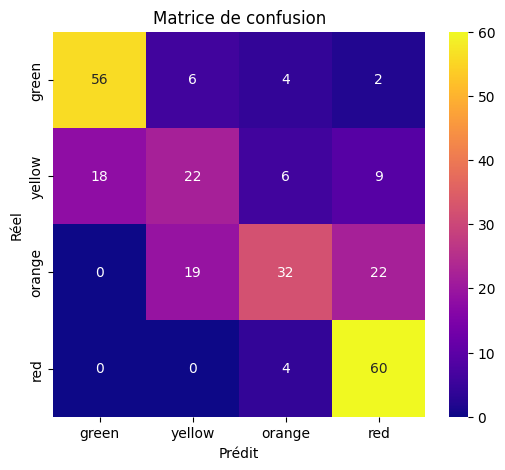

_____________________________________________
Essai sur échantillon de test LogisticRegression
Score = 0.6153846153846154
_____
Classification report
              precision    recall  f1-score   support

       green       0.79      0.76      0.78        68
      yellow       0.42      0.55      0.47        55
      orange       0.59      0.36      0.44        73
         red       0.67      0.81      0.73        64

    accuracy                           0.62       260
   macro avg       0.62      0.62      0.61       260
weighted avg       0.62      0.62      0.61       260

Confusion matrice
[[52 11  3  2]
 [14 30  4  7]
 [ 0 30 26 17]
 [ 0  1 11 52]]


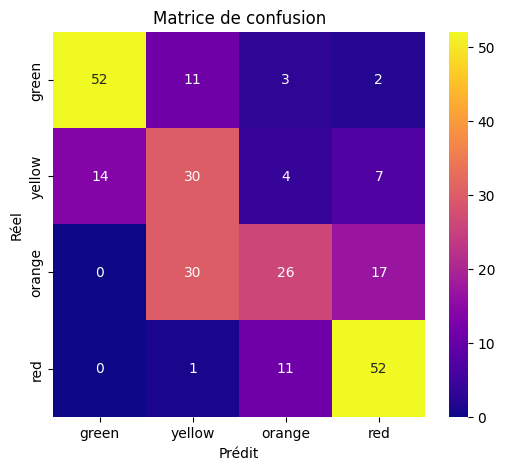

_____________________________________________
Essai sur échantillon de test RandomForestClassifier
Score = 0.9115384615384615
_____
Classification report
              precision    recall  f1-score   support

       green       0.92      0.84      0.88        68
      yellow       0.83      0.91      0.87        55
      orange       0.91      0.95      0.93        73
         red       0.98      0.95      0.97        64

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.91      0.91      0.91       260

Confusion matrice
[[57  7  4  0]
 [ 5 50  0  0]
 [ 0  3 69  1]
 [ 0  0  3 61]]


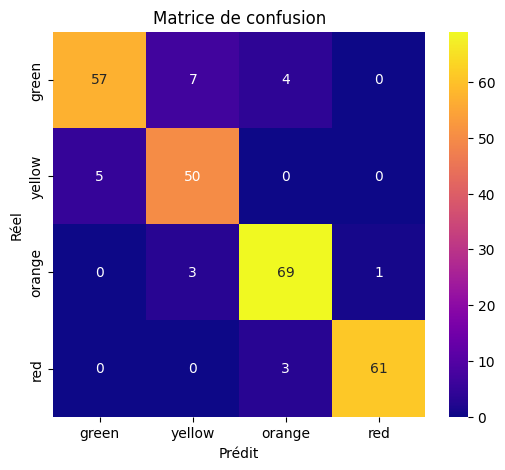

_____________________________________________
Essai sur échantillon de test CatBoost
Score = 0.9307692307692308
_____
Classification report
              precision    recall  f1-score   support

       green       0.97      0.84      0.90        68
      yellow       0.87      0.96      0.91        55
      orange       0.90      0.97      0.93        73
         red       1.00      0.95      0.98        64

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion matrice
[[57  6  5  0]
 [ 2 53  0  0]
 [ 0  2 71  0]
 [ 0  0  3 61]]


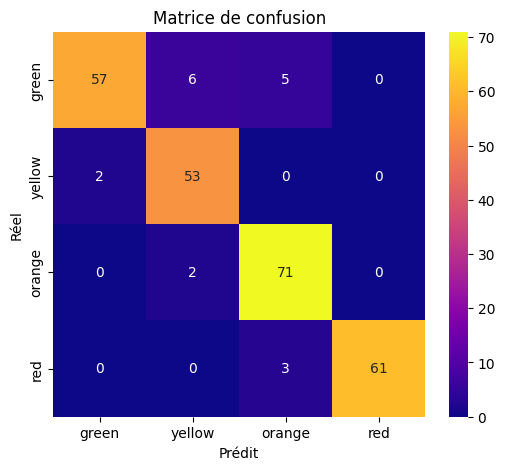

_____________________________________________
Essai sur échantillon de test XGBoostClassifier
Score = 0.9307692307692308
_____
Classification report
              precision    recall  f1-score   support

       green       0.95      0.85      0.90        68
      yellow       0.87      0.95      0.90        55
      orange       0.91      0.97      0.94        73
         red       1.00      0.95      0.98        64

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion matrice
[[58  6  4  0]
 [ 3 52  0  0]
 [ 0  2 71  0]
 [ 0  0  3 61]]


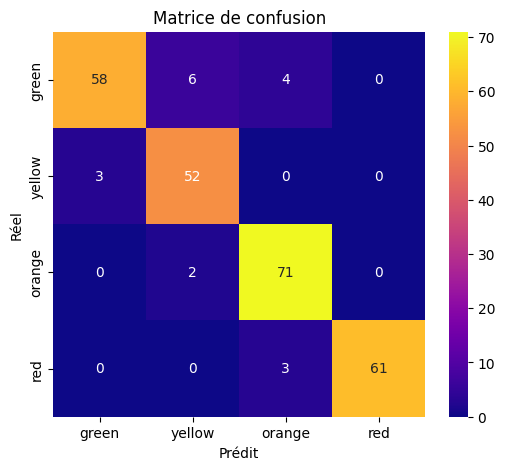

In [25]:
#Application de la fonction ci-desssus aux différents modèles 
model_scores = []
model_scores.append(("LinearSVC", evalution_data_test(model_LSVC, X_train_scaled, X_test_scaled, y_train, y_test, "LinearSVC")))
model_scores.append(("LogisticRegression", evalution_data_test(model_logreg, X_train_scaled, X_test_scaled, y_train, y_test, "LogisticRegression")))
model_scores.append(("RandomForestClassifier", evalution_data_test(model_RFC, X_train, X_test, y_train, y_test, "RandomForestClassifier")))
model_scores.append(("CatBoost", evalution_data_test(model_Catboost, X_train, X_test, y_train, y_test, "CatBoost")))
model_scores.append(("XGBoostClassifier", evalution_data_test(model_xgb, X_train, X_test, y_train_enc, y_test_enc, "XGBoostClassifier", le=le)))

In [26]:
#Tableau récapitulatif
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769


### Notes 
Les modèles basés sur les arbres et le boosting (RandomForest, CatBoost, XGBoost) obtiennent des scores d’accuracy supérieurs à 90% sur le jeu de test, surpassant nettement les modèles linéaires (LinearSVC, LogisticRegression). 

De plus pour les modèles ensemblistes, d'après les matrices de confusion et les classification reports, les classes les plus compliqués à prédire sont le jaune et l'orange ce qui est logique puisqu'il s'agit de niveaux d'alertes intermédiaires donc difficilement discriminiables (précision les moins élevées). La classe d’alerte verte a une précision élevée, ce qui signifie que lorsque le modèle prédit “vert”, il a rarement tort (peu de fausses alertes vertes). En revanche, son rappel est plus faible (0,84/0,85) : le modèle oublie donc certains cas réellement verts (plus de faux négatifs).

Les modèles Catboost et XGBoostClassifier semblent être le meilleurs (accuracy score de 0,93%).

Étant donné que ces deux modèles exploitent des approches de boosting similaires, nous nous concentrerons dans la suite sur XGBoostClassifier pour l’optimisation, et sur RandomForestClassifier afin de comparer avec un modèle à base d’arbres non boosté.

## 2- Essais avec la Classification hiérachique

L’idée ici est de comparer la classification multiclasse directe avec la classification hiérarchique.
Au vu des performances précédentes, nous nous concentrerons uniquement sur XGBoostClassifier, RandomForestClassifier et CatBoost.
La robustesse de ces modèles ayant déjà été évaluée individuellement, il n’est pas nécessaire de la tester à nouveau.
En effet, nous utilisons simplement ces trois modèles pour effectuer la classification hiérarchique.

In [27]:
#Définition de la fonction de classification hiérarchique

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def eval_hierarchical_model(X_train, X_test, y_train, y_test, model1, model2, model3, models_names): 
    # --- Entraînement ---
    model1.fit(X_train, (y_train == 'green').astype(int))
    
    mask2 = y_train != 'green'
    model2.fit(X_train[mask2], (y_train[mask2] == 'yellow').astype(int))
    
    mask3 = y_train.isin(['orange','red'])
    model3.fit(X_train[mask3], (y_train[mask3] == 'orange').astype(int))
    
    # --- Prédiction hiérarchique ---
    y_pred = []
    for i in range(len(X_test)):
        x = X_test.iloc[[i]]
        if model1.predict(x)[0] == 1:
            y_pred.append('green')
        elif model2.predict(x)[0] == 1:
            y_pred.append('yellow')
        elif model3.predict(x)[0] == 1:
            y_pred.append('orange')
        else:
            y_pred.append('red')
    
    # --- Score et matrice de confusion ---
    acc = sum([y_pred[i] == y_test.iloc[i] for i in range(len(y_test))]) / len(y_test)
    print("_____________________________________________")
    print(f'Essai sur échantillon de test {models_names}')
    print("Score =", round(acc, 3))
    
    cm = confusion_matrix(y_test, y_pred, labels=['green','yellow','orange','red'])
    print("\n_____ Classification report")
    print(classification_report(y_test, y_pred, labels=['green','yellow','orange','red']))
    print('Confusion matrice :\n', cm)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',
                xticklabels=['green','yellow','orange','red'],
                yticklabels=['green','yellow','orange','red'])
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.title("Matrice de confusion - Hiérarchique")
    plt.show()
    return(acc)


_____________________________________________
Essai sur échantillon de test RF1 > RF2 > RF3
Score = 0.912

_____ Classification report
              precision    recall  f1-score   support

       green       0.93      0.82      0.88        68
      yellow       0.80      0.93      0.86        55
      orange       0.93      0.93      0.93        73
         red       0.98      0.97      0.98        64

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.92      0.91      0.91       260

Confusion matrice :
 [[56  9  3  0]
 [ 4 51  0  0]
 [ 0  4 68  1]
 [ 0  0  2 62]]


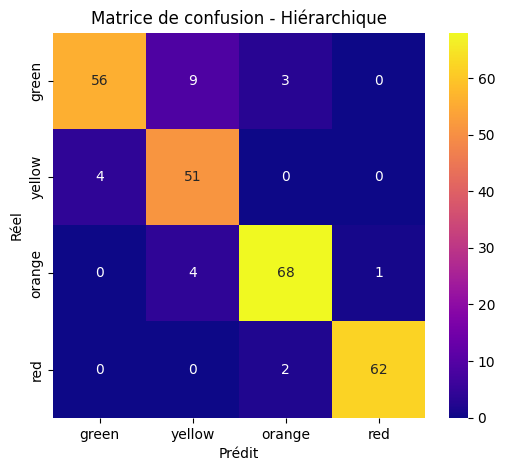

_____________________________________________
Essai sur échantillon de test CB1 > CB2 > CB3
Score = 0.927

_____ Classification report
              precision    recall  f1-score   support

       green       0.95      0.84      0.89        68
      yellow       0.85      0.95      0.90        55
      orange       0.91      0.96      0.93        73
         red       1.00      0.97      0.98        64

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion matrice :
 [[57  6  5  0]
 [ 3 52  0  0]
 [ 0  3 70  0]
 [ 0  0  2 62]]


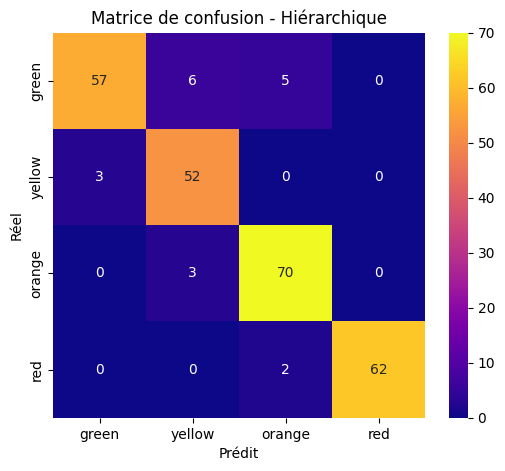

_____________________________________________
Essai sur échantillon de test XGB1 > XGB2 > XGB3
Score = 0.935

_____ Classification report
              precision    recall  f1-score   support

       green       0.97      0.84      0.90        68
      yellow       0.85      0.96      0.91        55
      orange       0.92      0.99      0.95        73
         red       1.00      0.95      0.98        64

    accuracy                           0.93       260
   macro avg       0.94      0.94      0.93       260
weighted avg       0.94      0.93      0.93       260

Confusion matrice :
 [[57  8  3  0]
 [ 2 53  0  0]
 [ 0  1 72  0]
 [ 0  0  3 61]]


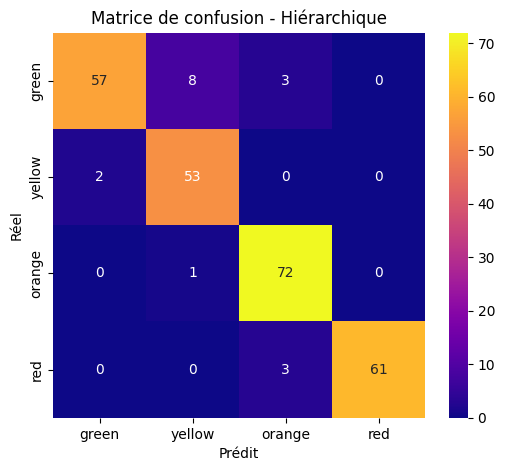

_____________________________________________
Essai sur échantillon de test RF1 > RF2 > CB1
Score = 0.912

_____ Classification report
              precision    recall  f1-score   support

       green       0.93      0.82      0.88        68
      yellow       0.80      0.93      0.86        55
      orange       0.93      0.93      0.93        73
         red       0.98      0.97      0.98        64

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.92      0.91      0.91       260

Confusion matrice :
 [[56  9  3  0]
 [ 4 51  0  0]
 [ 0  4 68  1]
 [ 0  0  2 62]]


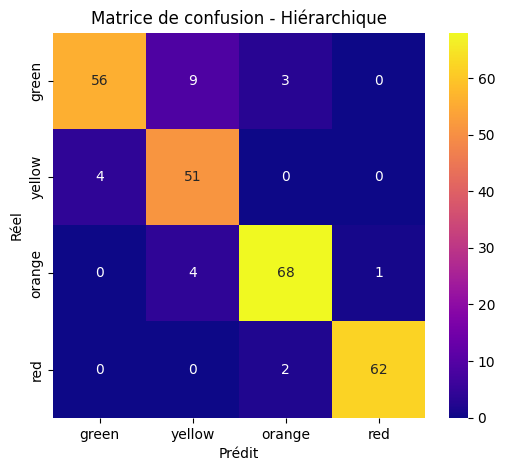

_____________________________________________
Essai sur échantillon de test CB1 > CB2 > RF1
Score = 0.923

_____ Classification report
              precision    recall  f1-score   support

       green       0.95      0.84      0.89        68
      yellow       0.85      0.95      0.90        55
      orange       0.92      0.95      0.93        73
         red       0.97      0.97      0.97        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.93      0.92      0.92       260

Confusion matrice :
 [[57  6  4  1]
 [ 3 52  0  0]
 [ 0  3 69  1]
 [ 0  0  2 62]]


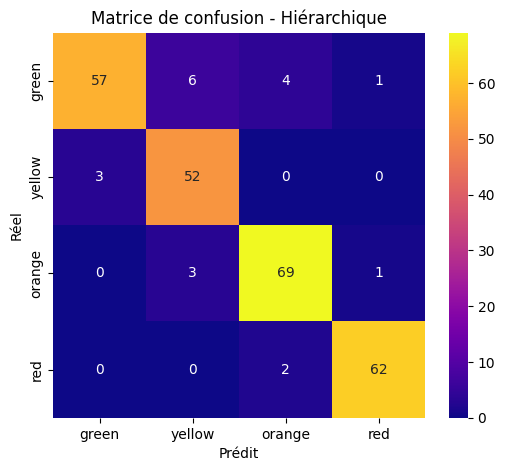

_____________________________________________
Essai sur échantillon de test CB2 > CB1 > RF1
Score = 0.927

_____ Classification report
              precision    recall  f1-score   support

       green       0.97      0.84      0.90        68
      yellow       0.85      0.96      0.91        55
      orange       0.92      0.95      0.93        73
         red       0.97      0.97      0.97        64

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion matrice :
 [[57  6  4  1]
 [ 2 53  0  0]
 [ 0  3 69  1]
 [ 0  0  2 62]]


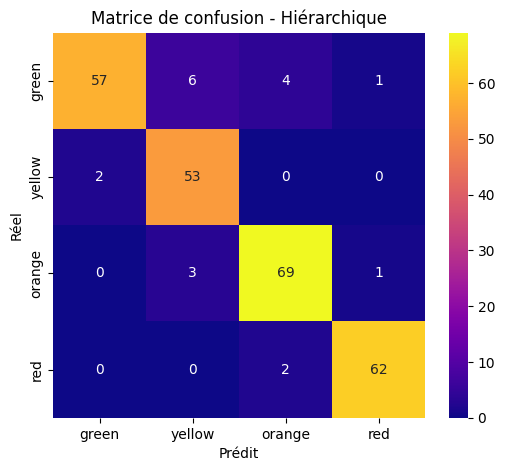

_____________________________________________
Essai sur échantillon de test CB1 > RF1 > CB2
Score = 0.927

_____ Classification report
              precision    recall  f1-score   support

       green       0.95      0.84      0.89        68
      yellow       0.85      0.95      0.90        55
      orange       0.92      0.96      0.94        73
         red       0.98      0.97      0.98        64

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion matrice :
 [[57  7  4  0]
 [ 3 52  0  0]
 [ 0  2 70  1]
 [ 0  0  2 62]]


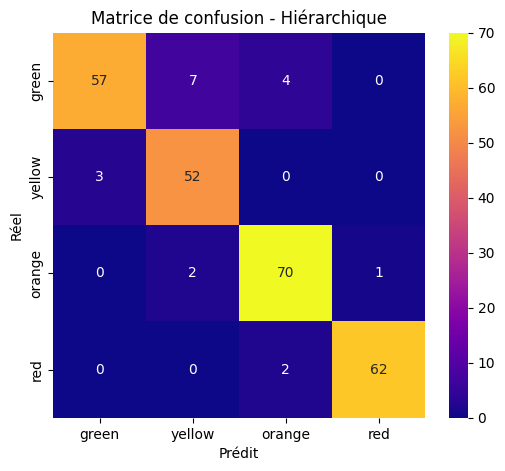

_____________________________________________
Essai sur échantillon de test XGB1 > XGB2 > RF1
Score = 0.935

_____ Classification report
              precision    recall  f1-score   support

       green       0.97      0.84      0.90        68
      yellow       0.85      0.96      0.91        55
      orange       0.95      0.97      0.96        73
         red       0.97      0.97      0.97        64

    accuracy                           0.93       260
   macro avg       0.93      0.94      0.93       260
weighted avg       0.94      0.93      0.93       260

Confusion matrice :
 [[57  8  2  1]
 [ 2 53  0  0]
 [ 0  1 71  1]
 [ 0  0  2 62]]


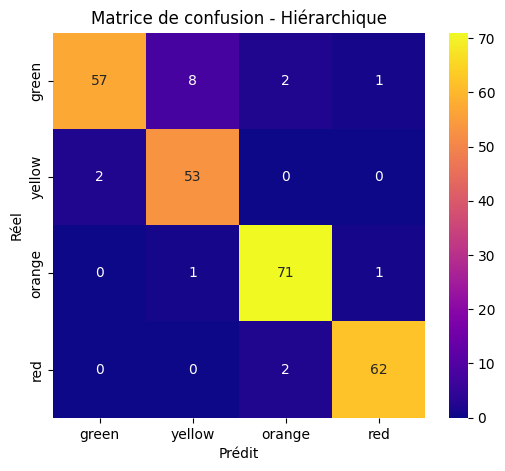

_____________________________________________
Essai sur échantillon de test RF1 > CB1 > XGB1
Score = 0.915

_____ Classification report
              precision    recall  f1-score   support

       green       0.93      0.82      0.88        68
      yellow       0.84      0.93      0.88        55
      orange       0.90      0.96      0.93        73
         red       1.00      0.95      0.98        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.92      0.92       260

Confusion matrice :
 [[56  7  5  0]
 [ 4 51  0  0]
 [ 0  3 70  0]
 [ 0  0  3 61]]


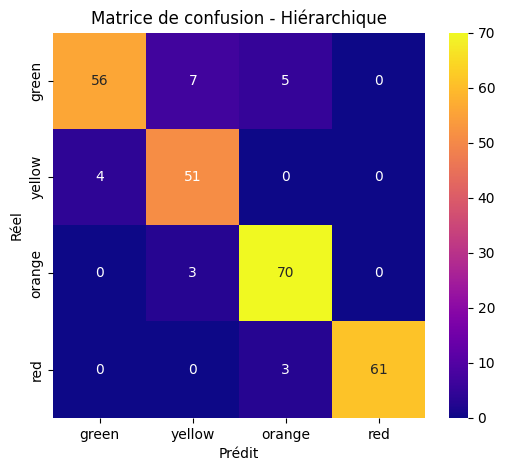

In [28]:
#Application de la fonction ci-dessus 

rf1 = RandomForestClassifier(random_state=42)
rf2 = RandomForestClassifier(random_state=45)
rf3 = RandomForestClassifier(random_state=47)
cb1 = cgb.CatBoostClassifier(random_state=42, verbose=0)
cb2 = cgb.CatBoostClassifier(random_state=45, verbose=0)
cb3 = cgb.CatBoostClassifier(random_state=47, verbose=0)
xgb1 = XGBClassifier(eval_metric='logloss', random_state=42)
xgb2 = XGBClassifier(eval_metric='logloss', random_state=45)
xgb3 = XGBClassifier(eval_metric='logloss', random_state=47)

results = []

# --- Trois modèles identiques ---
score_rf3 = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                   rf1, rf2, rf3,
                                   models_names="RF1 > RF2 > RF3")
results.append(("RF1 > RF2 > RF3", score_rf3))

score_cb3 = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                    cb1, cb2, cb3,
                                    models_names="CB1 > CB2 > CB3")
results.append(("CB1 > CB2 > CB3", score_cb3))

score_xgb3 = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1 > XGB2 > XGB3")
results.append(("XGB1 > XGB2 > XGB3", score_xgb3))

# --- Deux modèles identiques + un différent ---
score_rf2_cb = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                       rf1, rf2, cb1,
                                       models_names="RF1 > RF2 > CB1")
results.append(("RF1 > RF2 > CB1", score_rf2_cb))

score_cb2_rf = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                       cb1, cb2, rf1,
                                       models_names="CB1 > CB2 > RF1")
results.append(("CB1 > CB2 > RF1", score_cb2_rf))

score_cb22_rf = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                       cb2, cb1, rf1,
                                       models_names="CB2 > CB1 > RF1")
results.append(("CB2 > CB1 > RF1", score_cb2_rf))

score_cb2_rf = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                       cb1, rf1, cb2,
                                       models_names="CB1 > RF1 > CB2")
results.append(("CB1 > RF1 > CB2", score_cb2_rf))

score_xgb2_rf = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                        xgb1, xgb2, rf1,
                                        models_names="XGB1 > XGB2 > RF1")
results.append(("XGB1 > XGB2 > RF1", score_xgb2_rf))

# --- Trois modèles différents ---
score_all_diff = eval_hierarchical_model(X_train, X_test, y_train, y_test,
                                         rf1, cb1, xgb1,
                                         models_names="RF1 > CB1 > XGB1")
results.append(("RF1 > CB1 > XGB1", score_all_diff))



In [29]:
# --- Tableau récapitulatif ---
df_hierarchical = pd.DataFrame(results, columns=["Model_Combination", "Score"])
df_hierarchical

,Model_Combination,Score
0,RF1 > RF2 > RF3,0.911538
1,CB1 > CB2 > CB3,0.926923
2,XGB1 > XGB2 > XGB3,0.934615
3,RF1 > RF2 > CB1,0.911538
4,CB1 > CB2 > RF1,0.923077
5,CB2 > CB1 > RF1,0.923077
6,CB1 > RF1 > CB2,0.926923
7,XGB1 > XGB2 > RF1,0.934615
8,RF1 > CB1 > XGB1,0.915385


### Notes
Les résultats montrent que l’ordre et le choix des modèles dans la hiérarchie ont peu d’impact sur la performance finale : que l’on utilise trois modèles identiques ou différents, l’accuracy reste très proche (~91–93%), de même que précision et rappel. Les meilleurs modèles semblent être ceux contenant XGBoostClassifier.

De plus, ces scores (accuracy, précision et rappel) ne diffèrent pas beaucoup de ceux obtenus avec la classification multiclasse directe, ce qui suggère que la hiérarchie n’apporte pas d’avantage majeur pour ce jeu de données.

Toutefois, dans la suite nous continuerons de comparer ces deux types de classification et essayerons là aussi d'améliorer les performances de XGBoostClassifier et de RandomForestClassifier. Nous utiliserons donc la classification hiérarchique avec trois modèles identiques c'est-à-dire trois XGBoostClassifier ou trois RandomForestClassifier.

# II- Feature enginnering

Pour essayer d'améliorer la performance des modèles, nous avons essayé de passer la magnitude à l'échelle linéaire puisque celle-ci est une mesure expirmée en logarithme sur l'échelle de Richter. De plus, nous avons essayé de pondérer l'effet de CDI sur les alertes jaunes et oranges.  

Les alertes jaunes et oranges correspondent à des classes intermédiaires. Comme il s’agit d’une mesure subjective, le CDI peut être surestimé ou sous-estimé : certaines personnes peuvent exagérer les dégâts ressentis, tandis que d’autres peuvent les minimiser et cela est d'autant plus flagrant pour ces cas intermédiaires. Supprimer ce descripteur n'est pas une solution envisagée du fait de sa forte corrélation avec alert.

Nous avons aussi tenté de supprimer la variable sig qui pourrait être redondante avec d'autres descripteurs.

## 1- Préparation du dataset

In [30]:
# Passage de la magnitude à l'échelle linéaire
data["magnitude_linearisee"] = 10 ** data["magnitude"]

In [31]:
# Pondération du CDI pour les alertes jaunes et oranges
def pond_cdi(col, poids):
    if col["alert"] in ["yellow", "orange"]:
        return col["cdi"] * poids
    else:
        return col["cdi"]

# Liste des poids à tester
poids_list = [0.3, 0.5, 0.7]

# Boucle pour créer une colonne par poids
for p in poids_list:
    col_name = f"cdi_ponderee_{p}"
    data[col_name] = data.apply(lambda col: pond_cdi(col, p), axis=1)



In [32]:
#Visualisation du dataframe
print(data)

      magnitude  depth  cdi  mmi    sig   alert  magnitude_linearisee  \
0          7.00   14.0  8.0  7.0    0.0   green          1.000000e+07   
1          6.90   25.0  4.0  4.0  -33.0   green          7.943282e+06   
2          7.00  579.0  3.0  3.0  -13.0   green          1.000000e+07   
3          7.30   37.0  5.0  5.0   65.0   green          1.995262e+07   
4          6.60  624.0  0.0  2.0  -98.0   green          3.981072e+06   
...         ...    ...  ...  ...    ...     ...                   ...   
1295       6.87   11.0  9.0  7.0   13.0  yellow          7.413102e+06   
1296       7.85   93.0  8.0  6.0  -51.0  yellow          7.079458e+07   
1297       7.48  142.0  7.0  6.0  120.0  yellow          3.019952e+07   
1298       7.04   51.0  7.0  6.0 -115.0  yellow          1.096478e+07   
1299       6.50    9.0  9.0  8.0  -29.0  yellow          3.162278e+06   

      cdi_ponderee_0.3  cdi_ponderee_0.5  cdi_ponderee_0.7  
0                  8.0               8.0               8.0  
1

## 2- Essai sans SIG

In [33]:
#Sélection des descripteurs 
X_sig = data.drop(columns=[ "sig","alert", "magnitude_linearisee","cdi_ponderee_0.3",  "cdi_ponderee_0.5",  "cdi_ponderee_0.7" ])

#Séletion de la variable cible
y_feature1=data["alert"]

#Séparation de l'ensemble test et apprentissage
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_sig, y_feature1, random_state=42, train_size= 0.80)

In [34]:
#Label Encoding pour XGB
le = LabelEncoder()
y_train_enc_sig = le.fit_transform(y_train_sig)
y_test_enc_sig = le.transform(y_test_sig)

In [35]:
#Test de la robustesse des modèles 

#RFC
sc_RFC_sig = visualisation_cross_val(model_RFC, X_train_sig, y_train_sig, "RandomForestClassifier")

#xgboost
sc_xgb_sig = visualisation_cross_val(model_xgb, X_train_sig, y_train_enc_sig, "XGBClassifier")


___________________________
modèle de référence : RandomForestClassifier : [0.77403846 0.77884615 0.81730769 0.80769231 0.82692308]
moyenne 0.8009615384615383
___________________________
modèle de référence : XGBClassifier : [0.76923077 0.76442308 0.77403846 0.76442308 0.80769231]
moyenne 0.7759615384615385


### Notes
La performance des modèles testés est robuste puisque les résultats des 5 validations croisées restent dans le même ordre de grandeur. De plus nous constatons une performance sur l'ensemble d'apprentissage beaucoup plus faible sans le descripteur sig. 

### Classification directe

_____________________________________________
Essai sur échantillon de test RandomForestClassifier_sig
Score = 0.8346153846153846
_____
Classification report
              precision    recall  f1-score   support

       green       0.89      0.85      0.87        68
      yellow       0.75      0.76      0.76        55
      orange       0.80      0.82      0.81        73
         red       0.89      0.89      0.89        64

    accuracy                           0.83       260
   macro avg       0.83      0.83      0.83       260
weighted avg       0.84      0.83      0.84       260

Confusion matrice
[[58  8  2  0]
 [ 6 42  7  0]
 [ 1  5 60  7]
 [ 0  1  6 57]]


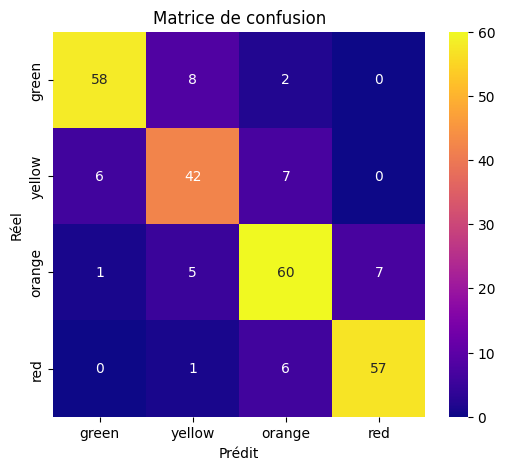

_____________________________________________
Essai sur échantillon de test XGBoostClassifier_sig
Score = 0.8615384615384616
_____
Classification report
              precision    recall  f1-score   support

       green       0.92      0.87      0.89        68
      yellow       0.79      0.84      0.81        55
      orange       0.82      0.86      0.84        73
         red       0.92      0.88      0.90        64

    accuracy                           0.86       260
   macro avg       0.86      0.86      0.86       260
weighted avg       0.86      0.86      0.86       260

Confusion matrice
[[59  5  3  1]
 [ 5 46  4  0]
 [ 0  6 63  4]
 [ 0  1  7 56]]


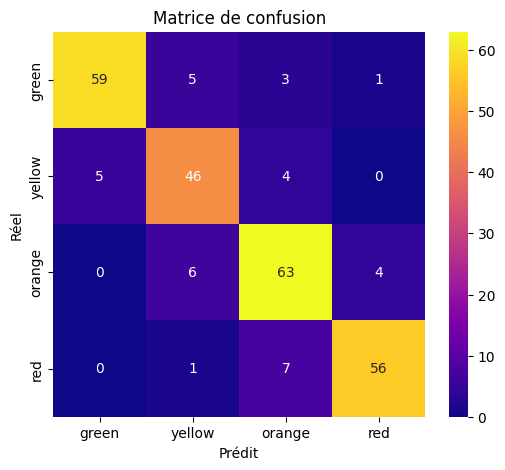

In [36]:
#Test sur les ensemble de test
model_scores.append(("RandomForestClassifier_sig", evalution_data_test(model_RFC, X_train_sig, X_test_sig, y_train_sig, y_test_sig, "RandomForestClassifier_sig")))
model_scores.append(("XGBoostClassifier_sig", evalution_data_test(model_xgb, X_train_sig, X_test_sig, y_train_enc_sig, y_test_enc_sig, "XGBoostClassifier_sig", le=le)))

In [37]:
#Tableau récapitulatif
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769
5,RandomForestClassifier_sig,0.834615
6,XGBoostClassifier_sig,0.861538


### Notes 
Sans le descripteur sig, la performance des deux modèles est diminuée.

### Classification hiérarchique

_____________________________________________
Essai sur échantillon de test RF1_sig > RF2_sig > RF3_sig
Score = 0.827

_____ Classification report
              precision    recall  f1-score   support

       green       0.92      0.84      0.88        68
      yellow       0.76      0.75      0.75        55
      orange       0.76      0.84      0.80        73
         red       0.88      0.88      0.88        64

    accuracy                           0.83       260
   macro avg       0.83      0.82      0.83       260
weighted avg       0.83      0.83      0.83       260

Confusion matrice :
 [[57  7  4  0]
 [ 5 41  8  1]
 [ 0  5 61  7]
 [ 0  1  7 56]]


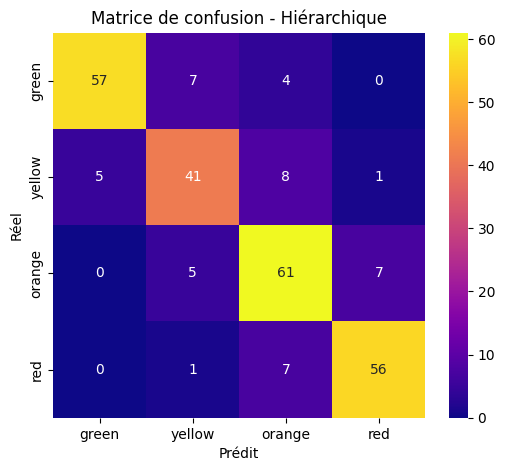

_____________________________________________
Essai sur échantillon de test XGB1_sig > XGB2_sig > XGB3_sig
Score = 0.846

_____ Classification report
              precision    recall  f1-score   support

       green       0.95      0.85      0.90        68
      yellow       0.75      0.82      0.78        55
      orange       0.79      0.82      0.81        73
         red       0.90      0.89      0.90        64

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260

Confusion matrice :
 [[58  6  3  1]
 [ 3 45  7  0]
 [ 0  8 60  5]
 [ 0  1  6 57]]


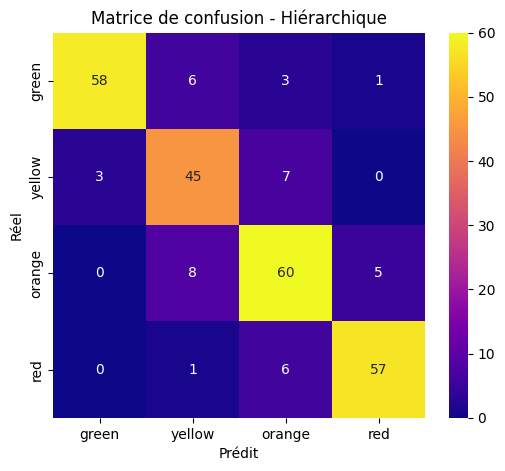

In [38]:
# --- Trois modèles identiques ---
score_rf3_sig = eval_hierarchical_model(X_train_sig, X_test_sig, y_train_sig, y_test_sig,
                                   rf1, rf2, rf3,
                                   models_names="RF1_sig > RF2_sig > RF3_sig")
results.append(("RF1_sig > RF2_sig > RF3_sig", score_rf3_sig))

score_xgb3_sig = eval_hierarchical_model(X_train_sig, X_test_sig, y_train_sig, y_test_sig,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1_sig > XGB2_sig > XGB3_sig")
results.append(("XGB1_sig > XGB2_sig > XGB3_sig", score_xgb3_sig))

In [39]:
# --- Tableau récapitulatif ---
df_hierarchical = pd.DataFrame(results, columns=["Model_Combination", "Score"])
df_hierarchical

,Model_Combination,Score
0,RF1 > RF2 > RF3,0.911538
1,CB1 > CB2 > CB3,0.926923
2,XGB1 > XGB2 > XGB3,0.934615
3,RF1 > RF2 > CB1,0.911538
4,CB1 > CB2 > RF1,0.923077
5,CB2 > CB1 > RF1,0.923077
6,CB1 > RF1 > CB2,0.926923
7,XGB1 > XGB2 > RF1,0.934615
8,RF1 > CB1 > XGB1,0.915385
9,RF1_sig > RF2_sig > RF3_sig,0.826923


### Notes 
Là aussi, sans le descripteur sig, la performance des deux modèles est diminuée. De plus, la classification hiérarchique semble ici être légèrement moins efficace que la classification directe puisque les scores sont de 0,82 contre 0,83 pour les RandomForest et de 0,84 contre 0,86 pour le XGBoost. De même que précision et rappel au global. Cela peut être dû au fait que les erreurs de prédiction sont ici dépendantes les unes des autres (erreurs en cascade).

Dans tous les cas, nous conservons pour la suite la vraible sig qui se révèle être indispensable à la bonne performance du modèle. 

En effet, la variable sig agit comme un score global de signification du séisme, combinant plusieurs informations essentielles telles que la magnitude, le MMI, le CDI et l’impact estimé sur la population.

Même si certaines de ces informations sont déjà présentes sous forme de features séparées, sig fournit une synthèse qui résume l’importance globale de l’événement, ce qui facilite la distinction entre les différents niveaux d’alerte.

Sans cette variable, le modèle perd une référence qui capture l’effet combiné des caractéristiques du séisme, entraînant une forte baisse de performance.

Ainsi, bien que redondante, sig est indispensable pour permettre au modèle d’évaluer correctement la gravité et le niveau d’alerte des séismes.

## 2- Essai avec la magnitude linéarisée

In [40]:
#Sélection des descripteurs 
X_ml = data.drop(columns=["magnitude","alert","cdi_ponderee_0.3",  "cdi_ponderee_0.5",  "cdi_ponderee_0.7" ])
#Séletion de la variable cible
y_feature_ml=data["alert"]
#Séparation de l'ensemble test et apprentissage
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_feature_ml, random_state=42, train_size= 0.80)

In [41]:
#Label Encoding pour XGB
le = LabelEncoder()
y_train_enc_ml = le.fit_transform(y_train_ml)
y_test_enc_ml = le.transform(y_test_ml)

In [42]:
#Test de la robustesse des modèles 

#RFC
sc_RFC_ml = visualisation_cross_val(model_RFC, X_train_ml, y_train_ml, "RandomForestClassifier")

#xgboost
sc_xgb_ml = visualisation_cross_val(model_xgb, X_train_ml, y_train_enc_ml, "XGBClassifier")

___________________________
modèle de référence : RandomForestClassifier : [0.86057692 0.89423077 0.91826923 0.92307692 0.90384615]
moyenne 0.9000000000000001
___________________________
modèle de référence : XGBClassifier : [0.89423077 0.88461538 0.875      0.91826923 0.89903846]
moyenne 0.8942307692307692


### Notes
La performance des modèles testés est robuste puisque les résultats des 5 validations croisées restent dans le même ordre de grandeur. De plus nous constatons une performance sur l'ensemble d'apprentissage quasi similaire à celle avec la magnitude non linéarisée. 

### Classification directe

_____________________________________________
Essai sur échantillon de test RandomForestClassifier_ml
Score = 0.9192307692307692
_____
Classification report
              precision    recall  f1-score   support

       green       0.93      0.84      0.88        68
      yellow       0.85      0.93      0.89        55
      orange       0.92      0.95      0.93        73
         red       0.97      0.97      0.97        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260

Confusion matrice
[[57  6  4  1]
 [ 4 51  0  0]
 [ 0  3 69  1]
 [ 0  0  2 62]]


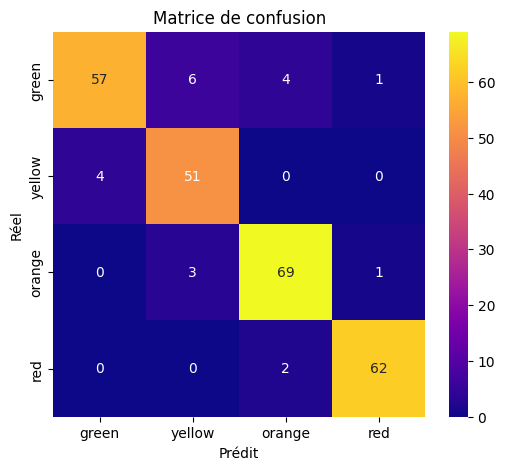

_____________________________________________
Essai sur échantillon de test XGBoostClassifier_ml
Score = 0.9346153846153846
_____
Classification report
              precision    recall  f1-score   support

       green       0.95      0.87      0.91        68
      yellow       0.88      0.95      0.91        55
      orange       0.91      0.97      0.94        73
         red       1.00      0.95      0.98        64

    accuracy                           0.93       260
   macro avg       0.94      0.93      0.93       260
weighted avg       0.94      0.93      0.93       260

Confusion matrice
[[59  5  4  0]
 [ 3 52  0  0]
 [ 0  2 71  0]
 [ 0  0  3 61]]


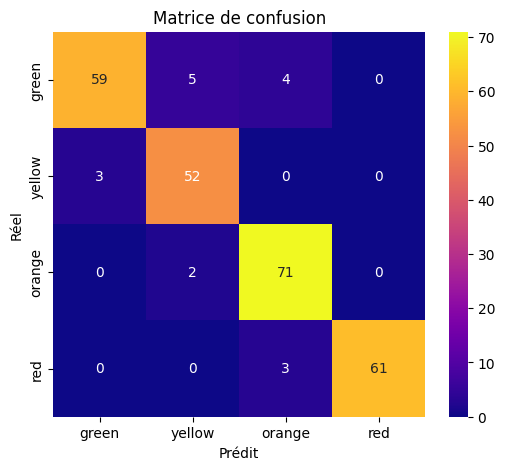

In [43]:
model_scores.append(("RandomForestClassifier_ml", evalution_data_test(model_RFC, X_train_ml, X_test_ml, y_train_ml, y_test_ml, "RandomForestClassifier_ml")))
model_scores.append(("XGBoostClassifier_ml", evalution_data_test(model_xgb, X_train_ml, X_test_ml, y_train_enc_ml, y_test_enc_ml, "XGBoostClassifier_ml", le=le)))

In [44]:
#Tableau récapitulatif 
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769
5,RandomForestClassifier_sig,0.834615
6,XGBoostClassifier_sig,0.861538
7,RandomForestClassifier_ml,0.919231
8,XGBoostClassifier_ml,0.934615


### Notes 
La performance sur l'ensemble de test est quasi similaire à celle avec la magnitude non linéarisée. Nous garderons par la suite la magnitude linéarisée.

### Classification hiérarchique

_____________________________________________
Essai sur échantillon de test RF1_ml > RF2_ml > RF3_ml
Score = 0.919

_____ Classification report
              precision    recall  f1-score   support

       green       0.92      0.84      0.88        68
      yellow       0.82      0.91      0.86        55
      orange       0.95      0.95      0.95        73
         red       0.98      0.98      0.98        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260

Confusion matrice :
 [[57  8  3  0]
 [ 5 50  0  0]
 [ 0  3 69  1]
 [ 0  0  1 63]]


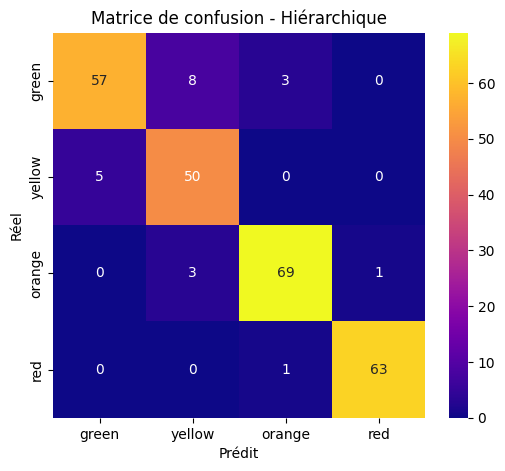

_____________________________________________
Essai sur échantillon de test XGB1_ml > XGB2_ml > XGB3_ml
Score = 0.938

_____ Classification report
              precision    recall  f1-score   support

       green       0.98      0.84      0.90        68
      yellow       0.86      0.98      0.92        55
      orange       0.92      0.99      0.95        73
         red       1.00      0.95      0.98        64

    accuracy                           0.94       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.94      0.94      0.94       260

Confusion matrice :
 [[57  8  3  0]
 [ 1 54  0  0]
 [ 0  1 72  0]
 [ 0  0  3 61]]


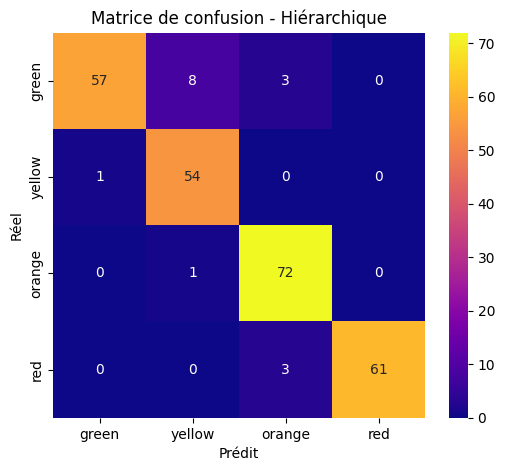

In [45]:
# --- Trois modèles identiques ---
score_rf3_ml = eval_hierarchical_model(X_train_ml, X_test_ml, y_train_ml, y_test_ml,
                                   rf1, rf2, rf3,
                                   models_names="RF1_ml > RF2_ml > RF3_ml")
results.append(("RF1_ml > RF2_ml > RF3_ml", score_rf3_ml))

score_xgb3_ml = eval_hierarchical_model(X_train_ml, X_test_ml, y_train_ml, y_test_ml,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1_ml > XGB2_ml > XGB3_ml")
results.append(("XGB1_ml > XGB2_ml > XGB3_ml", score_xgb3_ml))

In [46]:
# --- Tableau récapitulatif ---
df_hierarchical = pd.DataFrame(results, columns=["Model_Combination", "Score"])
df_hierarchical

,Model_Combination,Score
0,RF1 > RF2 > RF3,0.911538
1,CB1 > CB2 > CB3,0.926923
2,XGB1 > XGB2 > XGB3,0.934615
3,RF1 > RF2 > CB1,0.911538
4,CB1 > CB2 > RF1,0.923077
5,CB2 > CB1 > RF1,0.923077
6,CB1 > RF1 > CB2,0.926923
7,XGB1 > XGB2 > RF1,0.934615
8,RF1 > CB1 > XGB1,0.915385
9,RF1_sig > RF2_sig > RF3_sig,0.826923


### Notes 
La performance sur l'ensemble de test est quasi similaire à celle avec la magnitude non linéarisée. De plus, la performance entre la classification directe et hiérarchique que ce soit pour les modèles xgb et randmforest est aussi quasi identique. Là aussi, nous garderons pour la suite la magnitude linéarisée.

### Essai avec les CDI pondérés

In [47]:
#Sélection des descripteurs 
#Séletion de la variable cible
#Séparation de l'ensemble test et apprentissage

X_po3 = data.drop(columns=["magnitude","cdi","alert", "cdi_ponderee_0.5",  "cdi_ponderee_0.7" ])
y_feature_pond=data["alert"]
X_train_po3, X_test_po3, y_train_pond, y_test_pond = train_test_split(X_po3, y_feature_pond, random_state=42, train_size= 0.80)

X_po5 = data.drop(columns=["magnitude","cdi","alert", "cdi_ponderee_0.3",  "cdi_ponderee_0.7" ])
y_feature_pond=data["alert"]
X_train_po5, X_test_po5, y_train_pond, y_test_pond = train_test_split(X_po5, y_feature_pond, random_state=42, train_size= 0.80)

X_po7 = data.drop(columns=["magnitude","cdi","alert", "cdi_ponderee_0.3",  "cdi_ponderee_0.5" ])
y_feature_pond=data["alert"]
X_train_po7, X_test_po7, y_train_pond, y_test_pond = train_test_split(X_po7, y_feature_pond, random_state=42, train_size= 0.80)

In [48]:
#Label Encoding pour XGB
le = LabelEncoder()
y_train_enc_pond = le.fit_transform(y_train_pond)
y_test_enc_pond = le.transform(y_test_pond)

In [49]:
#Test de la robustesse des modèles 

#RFC
sc_RFC_po3 = visualisation_cross_val(model_RFC, X_train_po3, y_train_pond, "RandomForestClassifier_po3")

#xgboost
sc_xgb_po3 = visualisation_cross_val(model_xgb, X_train_po3, y_train_enc_pond, "XGBClassifier_po3")

#RFC
sc_RFC_po5 = visualisation_cross_val(model_RFC, X_train_po5, y_train_pond, "RandomForestClassifier_po5")

#xgboost
sc_xgb_po5 = visualisation_cross_val(model_xgb, X_train_po5, y_train_enc_pond, "XGBClassifier_po5")

#RFC
sc_RFC_po7 = visualisation_cross_val(model_RFC, X_train_po7, y_train_pond, "RandomForestClassifier_po7")

#xgboost
sc_xgb_po7 = visualisation_cross_val(model_xgb, X_train_po7, y_train_enc_pond, "XGBClassifier_po7")

___________________________
modèle de référence : RandomForestClassifier_po3 : [0.95673077 0.96634615 0.97115385 0.97115385 0.95673077]
moyenne 0.964423076923077
___________________________
modèle de référence : XGBClassifier_po3 : [0.96634615 0.97115385 0.95192308 0.97596154 0.98557692]
moyenne 0.9701923076923077
___________________________
modèle de référence : RandomForestClassifier_po5 : [0.9375     0.96634615 0.9375     0.96153846 0.94711538]
moyenne 0.95
___________________________
modèle de référence : XGBClassifier_po5 : [0.95192308 0.96153846 0.9375     0.97115385 0.95673077]
moyenne 0.9557692307692308
___________________________
modèle de référence : RandomForestClassifier_po7 : [0.9375     0.94230769 0.94711538 0.95192308 0.95673077]
moyenne 0.9471153846153845
___________________________
modèle de référence : XGBClassifier_po7 : [0.95192308 0.96634615 0.94711538 0.96634615 0.97115385]
moyenne 0.960576923076923


### Notes
La performance des modèles testés est robuste puisque les résultats des 5 validations croisées restent dans le même ordre de grandeur. De plus nous constatons une performance sur l'ensemble d'apprentissage fortement augmentée du fait de la pondération du CDI pour les classes jaune et orange. Plus la pondération est faible, meilleure est la performance.

### Classification directe

_____________________________________________
Essai sur échantillon de test RandomForestClassifier_po3
Score = 0.9692307692307692
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.94      0.96        68
      yellow       0.93      1.00      0.96        55
      orange       1.00      0.96      0.98        73
         red       0.95      0.98      0.97        64

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[64  1  0  3]
 [ 0 55  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


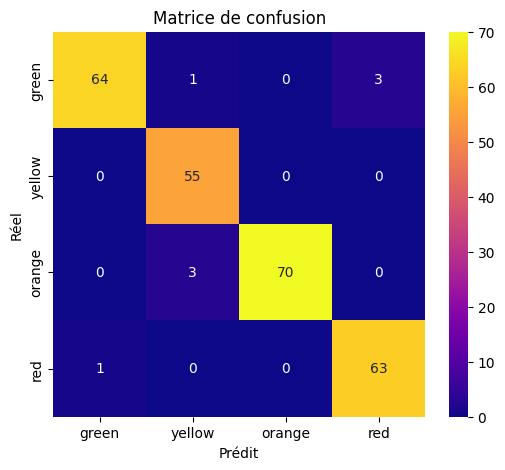

_____________________________________________
Essai sur échantillon de test XGBoostClassifier_po3
Score = 0.9730769230769231
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.94      0.96        68
      yellow       0.96      1.00      0.98        55
      orange       1.00      0.97      0.99        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[64  0  0  4]
 [ 0 55  0  0]
 [ 0  2 71  0]
 [ 1  0  0 63]]


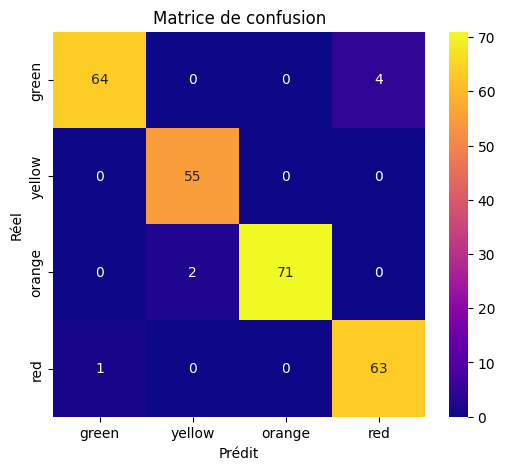

_____________________________________________
Essai sur échantillon de test RandomForestClassifier_po5
Score = 0.9692307692307692
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.94      0.96        68
      yellow       0.93      1.00      0.96        55
      orange       1.00      0.96      0.98        73
         red       0.95      0.98      0.97        64

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[64  1  0  3]
 [ 0 55  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


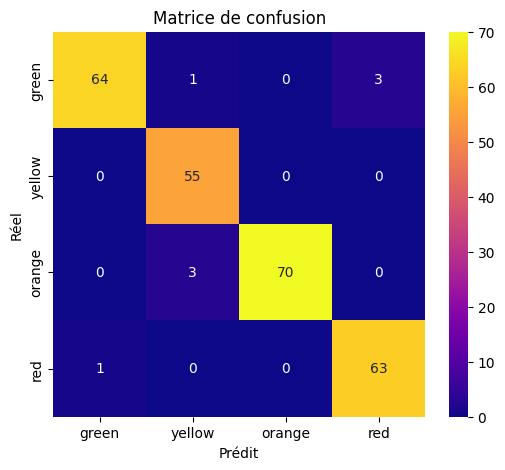

_____________________________________________
Essai sur échantillon de test XGBoostClassifier_po5
Score = 0.9653846153846154
_____
Classification report
              precision    recall  f1-score   support

       green       0.97      0.93      0.95        68
      yellow       0.95      0.98      0.96        55
      orange       1.00      0.97      0.99        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.96      0.97      0.96       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[63  1  0  4]
 [ 1 54  0  0]
 [ 0  2 71  0]
 [ 1  0  0 63]]


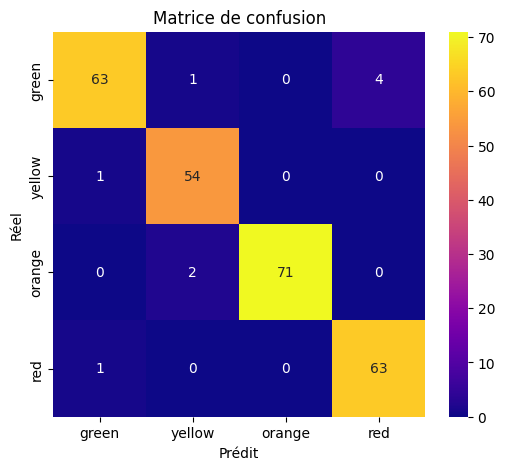

_____________________________________________
Essai sur échantillon de test RandomForestClassifier_po7
Score = 0.9615384615384616
_____
Classification report
              precision    recall  f1-score   support

       green       0.97      0.93      0.95        68
      yellow       0.93      0.98      0.96        55
      orange       1.00      0.96      0.98        73
         red       0.94      0.98      0.96        64

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Confusion matrice
[[63  1  0  4]
 [ 1 54  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


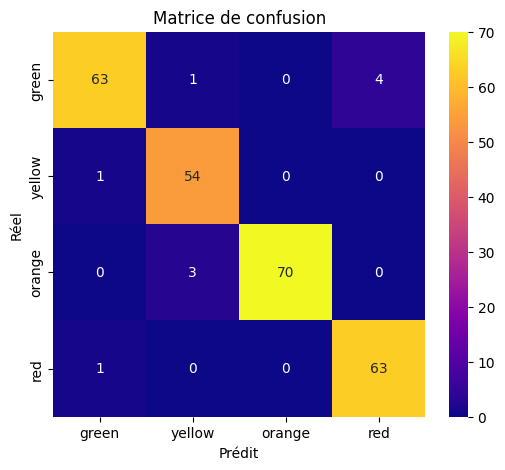

_____________________________________________
Essai sur échantillon de test XGBoostClassifier_po7
Score = 0.9653846153846154
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.93      0.95        68
      yellow       0.95      1.00      0.97        55
      orange       1.00      0.96      0.98        73
         red       0.93      0.98      0.95        64

    accuracy                           0.97       260
   macro avg       0.96      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[63  0  0  5]
 [ 0 55  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


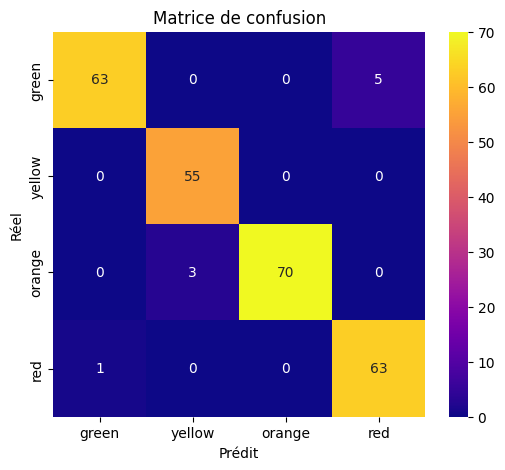

In [50]:
model_scores.append(("RandomForestClassifier_po3", evalution_data_test(model_RFC, X_train_po3, X_test_po3, y_train_pond, y_test_pond, "RandomForestClassifier_po3")))
model_scores.append(("XGBoostClassifier_po3", evalution_data_test(model_xgb, X_train_po3, X_test_po3, y_train_enc_pond, y_test_enc_pond, "XGBoostClassifier_po3", le=le)))

model_scores.append(("RandomForestClassifier_po5", evalution_data_test(model_RFC, X_train_po5, X_test_po5, y_train_pond, y_test_pond, "RandomForestClassifier_po5")))
model_scores.append(("XGBoostClassifier_po5", evalution_data_test(model_xgb, X_train_po5, X_test_po5, y_train_enc_pond, y_test_enc_pond, "XGBoostClassifier_po5", le=le)))

model_scores.append(("RandomForestClassifier_po7", evalution_data_test(model_RFC, X_train_po7, X_test_po7, y_train_pond, y_test_pond, "RandomForestClassifier_po7")))
model_scores.append(("XGBoostClassifier_po7", evalution_data_test(model_xgb, X_train_po7, X_test_po7, y_train_enc_pond, y_test_enc_pond, "XGBoostClassifier_po7", le=le)))

In [51]:
#Tableau Récapitulatif
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769
5,RandomForestClassifier_sig,0.834615
6,XGBoostClassifier_sig,0.861538
7,RandomForestClassifier_ml,0.919231
8,XGBoostClassifier_ml,0.934615
9,RandomForestClassifier_po3,0.969231


Les performances sur l'ensemble de test sont fortement augmentées du fait de la pondération des CDI pour les classes jaune et orange. La précision pour jaune et orange a augmenté passant d'environ 0,88 pour jaune à 0,94 en moyenne et d'environ 0,91 à 1 pour orange. De même, le rappel pour vert a aussi augmenté passant d'environ 0,85 à 0,94. Ainsi, les modèles arrivent mieux à classer les cas intermédiaires (jaune et orange) et identifie plus correctement les alertes réellement vertes.
  
Là aussi, plus la pondération est faible meilleure est la prédiction. 

Le modèle le plus performant semble alors XGBoostClassifier avec une pondération des CDI à 0,3, sur l'ensemble de test, l'accuracy renvoyée est de 0,97.

### Classification hiérarchique

_____________________________________________
Essai sur échantillon de test RF1_po3 > RF2_po3 > RF3_po3
Score = 0.965

_____ Classification report
              precision    recall  f1-score   support

       green       0.98      0.93      0.95        68
      yellow       0.93      1.00      0.96        55
      orange       1.00      0.96      0.98        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.96      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice :
 [[63  1  0  4]
 [ 0 55  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


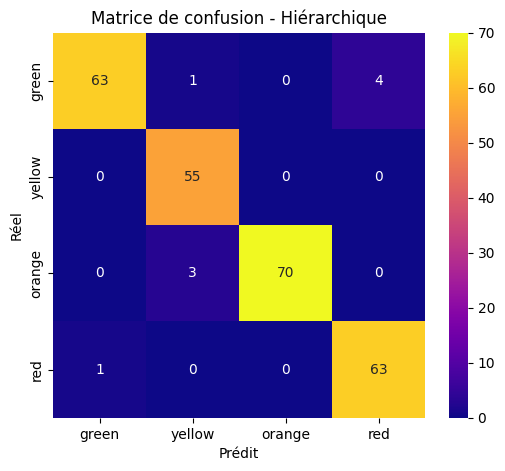

_____________________________________________
Essai sur échantillon de test XGB1_po3 > XGB2_po3 > XGB3_po3
Score = 0.973

_____ Classification report
              precision    recall  f1-score   support

       green       0.98      0.94      0.96        68
      yellow       0.96      1.00      0.98        55
      orange       1.00      0.97      0.99        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice :
 [[64  0  0  4]
 [ 0 55  0  0]
 [ 0  2 71  0]
 [ 1  0  0 63]]


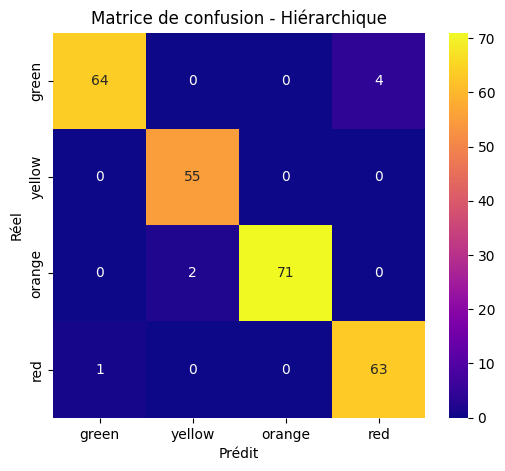

_____________________________________________
Essai sur échantillon de test RF1_po5 > RF2_po5 > RF3_po5
Score = 0.965

_____ Classification report
              precision    recall  f1-score   support

       green       0.98      0.93      0.95        68
      yellow       0.93      1.00      0.96        55
      orange       1.00      0.96      0.98        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.96      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice :
 [[63  1  0  4]
 [ 0 55  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


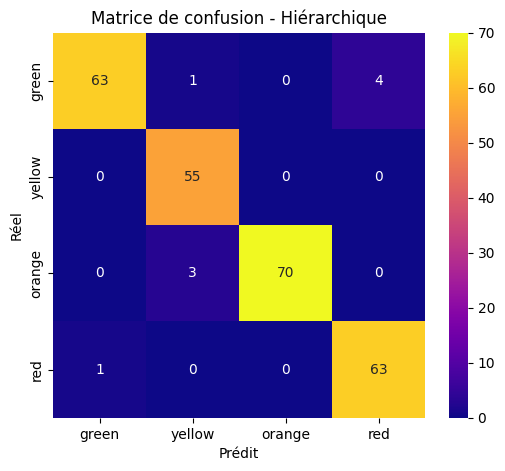

_____________________________________________
Essai sur échantillon de test XGB1_po5 > XGB2_po5 > XGB3_po5
Score = 0.958

_____ Classification report
              precision    recall  f1-score   support

       green       0.95      0.91      0.93        68
      yellow       0.95      0.96      0.95        55
      orange       1.00      0.97      0.99        73
         red       0.93      0.98      0.95        64

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Confusion matrice :
 [[62  1  0  5]
 [ 2 53  0  0]
 [ 0  2 71  0]
 [ 1  0  0 63]]


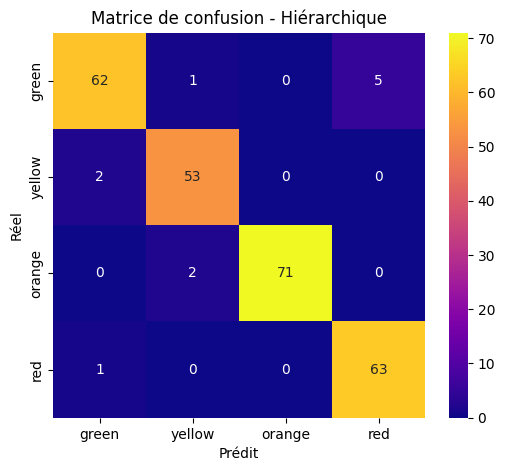

_____________________________________________
Essai sur échantillon de test RF1_po7 > RF2_po7 > RF3_po7
Score = 0.95

_____ Classification report
              precision    recall  f1-score   support

       green       0.97      0.88      0.92        68
      yellow       0.93      0.98      0.96        55
      orange       0.99      0.96      0.97        73
         red       0.91      0.98      0.95        64

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260

Confusion matrice :
 [[60  1  1  6]
 [ 1 54  0  0]
 [ 0  3 70  0]
 [ 1  0  0 63]]


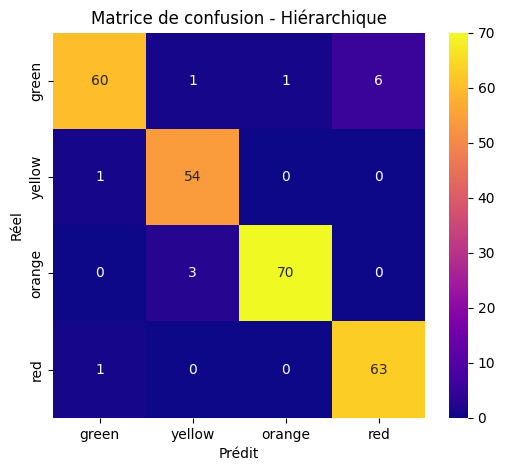

_____________________________________________
Essai sur échantillon de test XGB1_po7 > XGB2_po7 > XGB3_po7
Score = 0.962

_____ Classification report
              precision    recall  f1-score   support

       green       0.97      0.91      0.94        68
      yellow       0.96      0.98      0.97        55
      orange       1.00      0.97      0.99        73
         red       0.91      0.98      0.95        64

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Confusion matrice :
 [[62  0  0  6]
 [ 1 54  0  0]
 [ 0  2 71  0]
 [ 1  0  0 63]]


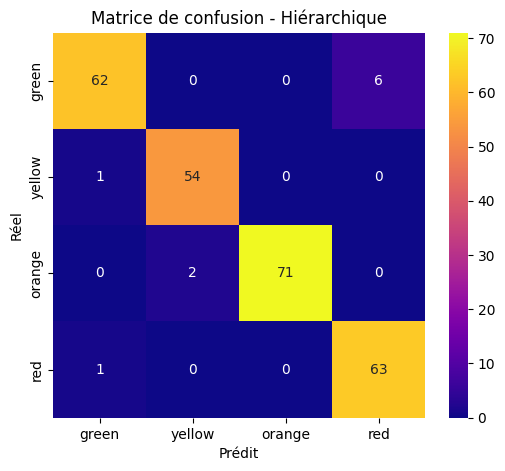

In [52]:
# --- Trois modèles identiques ---
score_rf3_po3 = eval_hierarchical_model(X_train_po3, X_test_po3, y_train_pond, y_test_pond,
                                   rf1, rf2, rf3,
                                   models_names="RF1_po3 > RF2_po3 > RF3_po3")
results.append(("RF1_po3 > RF2_po3 > RF3_po3", score_rf3_po3))

score_xgb3_po3 = eval_hierarchical_model(X_train_po3, X_test_po3, y_train_pond, y_test_pond,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1_po3 > XGB2_po3 > XGB3_po3")
results.append(("XGB1_po3 > XGB2_po3 > XGB3_po3", score_xgb3_po3))

score_rf3_po5 = eval_hierarchical_model(X_train_po5, X_test_po5, y_train_pond, y_test_pond,
                                   rf1, rf2, rf3,
                                   models_names="RF1_po5 > RF2_po5 > RF3_po5")
results.append(("RF1_po5 > RF2_po5 > RF3_po5", score_rf3_po5))

score_xgb3_po5 = eval_hierarchical_model(X_train_po5, X_test_po5, y_train_pond, y_test_pond,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1_po5 > XGB2_po5 > XGB3_po5")
results.append(("XGB1_po5 > XGB2_po5 > XGB3_po5", score_xgb3_po5))

score_rf3_po7 = eval_hierarchical_model(X_train_po7, X_test_po7, y_train_pond, y_test_pond,
                                   rf1, rf2, rf3,
                                   models_names="RF1_po7 > RF2_po7 > RF3_po7")
results.append(("RF1_po7 > RF2_po7 > RF3_po7", score_rf3_po7))

score_xgb3_po7 = eval_hierarchical_model(X_train_po7, X_test_po7, y_train_pond, y_test_pond,
                                     xgb1, xgb2, xgb3,
                                     models_names="XGB1_po7 > XGB2_po7 > XGB3_po7")
results.append(("XGB1_po7 > XGB2_po7 > XGB3_po7", score_xgb3_po7))

In [53]:
# --- Tableau récapitulatif ---
df_hierarchical = pd.DataFrame(results, columns=["Model_Combination", "Score"])
df_hierarchical

,Model_Combination,Score
0,RF1 > RF2 > RF3,0.911538
1,CB1 > CB2 > CB3,0.926923
2,XGB1 > XGB2 > XGB3,0.934615
3,RF1 > RF2 > CB1,0.911538
4,CB1 > CB2 > RF1,0.923077
5,CB2 > CB1 > RF1,0.923077
6,CB1 > RF1 > CB2,0.926923
7,XGB1 > XGB2 > RF1,0.934615
8,RF1 > CB1 > XGB1,0.915385
9,RF1_sig > RF2_sig > RF3_sig,0.826923


### Notes 
La classification hiérarchique là encore ne permet pas d'augmenter la performance des modèles, soit les résultats restent dans le même ordre de grandeur que ceux de la classification directe soit ils sont légèrement moins bons. 
Là aussi, la pondération des CDI permet d'augmenter les performances du modèles.

Dans la suite, nous n'utiliserons plus la classification hiérarchique, celle-ci, n’apporte pas d’avantage majeur pour ce jeu de données.

Nous allons essayer de tuner les modèles XGBoostClassifier et RandomForestClassifier. 

# III- Tuning des hyperparamètres

# 1- XGBClassifier

In [54]:
import optuna
from sklearn.model_selection import StratifiedKFold

# --- Définition de la fonction objectif pour Optuna ---
def objective(trial):
# Suggestion des hyperparamètres à tester par Optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2, log=True),
    }

# Création du modèle XGBoost avec les hyperparamètres proposés
    model = XGBClassifier(**params)

# Validation croisée stratifiée à 5 folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle sur les folds et calcul de la précision
    scores = cross_val_score(model, X_train_po3, y_train_enc_pond, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()
    
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Création et lancement de l'étude Optuna pour maximiser l’accuracy
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

print("Comparaison avec le modèle par défaut")
print(np.mean(sc_xgb_po3))

/Users/valentinemichelet/opt/anaconda3/envs/torch2025/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Best hyperparameters: {'n_estimators': 392, 'max_depth': 6, 'learning_rate': 0.17231715234412953}
Best accuracy: 0.9701923076923077
Comparaison avec le modèle par défaut
0.9701923076923077


_____________________________________________
Essai sur échantillon de test XGB_Optuna
Score = 0.9730769230769231
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.93      0.95        68
      yellow       0.96      1.00      0.98        55
      orange       1.00      0.99      0.99        73
         red       0.94      0.98      0.96        64

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Confusion matrice
[[63  1  0  4]
 [ 0 55  0  0]
 [ 0  1 72  0]
 [ 1  0  0 63]]


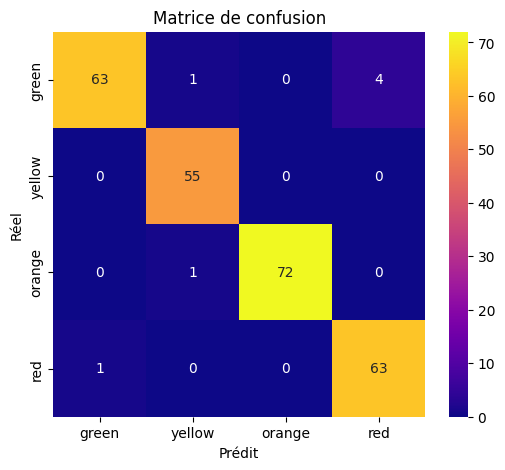

In [55]:
# Test sur l'ensemble de test
best_params = study.best_params
model_optuna_xgb = XGBClassifier(**best_params)
model_scores.append(("XGBoostClassifier_tunning", evalution_data_test(model_optuna_xgb, X_train_po3, X_test_po3, y_train_enc_pond, y_test_enc_pond, "XGB_Optuna", le=le)))

In [56]:
#Tableau récapitulatif
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769
5,RandomForestClassifier_sig,0.834615
6,XGBoostClassifier_sig,0.861538
7,RandomForestClassifier_ml,0.919231
8,XGBoostClassifier_ml,0.934615
9,RandomForestClassifier_po3,0.969231


### Notes

En comparant avec le modèle par défaut (XGBoostClassifier_po3 pour l'ensemble de test et sc_xgb_po3 pour l'ensemble d'apprentissage) :

Nous remarquons pour le modèle optimisé que:

- La performance sur train ≈ modèle par défaut 
- La performance sur test ≈ modèle par défaut 

Le modèle par défaut XGBoostClassifier était donc déjà bien optimisé.

# 2- RandomForestClassifier

In [57]:
# --- Définition de la fonction objectif pour Optuna ---

def objective_rfc(trial):
# Suggestion des hyperparamètres à tester par Optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42,
        'n_jobs': -1
    }

# Création du modèle RFC avec les hyperparamètres proposés
    model = RandomForestClassifier(**params)

# Validation croisée stratifiée à 5 folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation du modèle sur les folds et calcul de la précision
    scores = cross_val_score(model, X_train_po3, y_train_pond, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Création et lancement de l'étude Optuna pour maximiser l’accuracy
study_rfc = optuna.create_study(direction='maximize')
study_rfc.optimize(objective_rfc, n_trials=100) 

print("Best hyperparameters RFC:", study_rfc.best_params)
print("Best CV accuracy RFC:", study_rfc.best_value)

print("Comparaison avec le modèle par défaut")
print(np.mean(sc_RFC_po3))

Best hyperparameters RFC: {'n_estimators': 253, 'max_depth': 10, 'max_features': 'sqrt'}
Best CV accuracy RFC: 0.9567307692307692
Comparaison avec le modèle par défaut
0.964423076923077


_____________________________________________
Essai sur échantillon de test RFC_Optuna
Score = 0.9769230769230769
_____
Classification report
              precision    recall  f1-score   support

       green       0.98      0.94      0.96        68
      yellow       0.96      1.00      0.98        55
      orange       1.00      0.99      0.99        73
         red       0.95      0.98      0.97        64

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260

Confusion matrice
[[64  1  0  3]
 [ 0 55  0  0]
 [ 0  1 72  0]
 [ 1  0  0 63]]


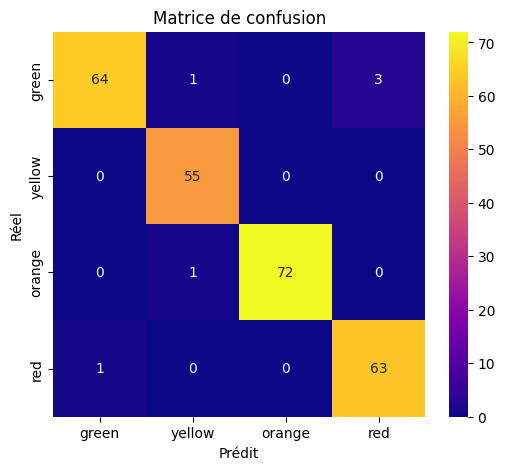

In [58]:
#Test sur l'ensemble de test
best_params1 = study_rfc.best_params
model_optuna_rfc = RandomForestClassifier(**best_params1)
model_scores.append(("RandomForestClassifier_tunning", evalution_data_test(model_optuna_rfc, X_train_po3, X_test_po3, y_train_pond, y_test_pond, "RFC_Optuna")))

In [59]:
#Tableau récapitulatif
df_models = pd.DataFrame(model_scores, columns=["Model", "Score"])
df_models

,Model,Score
0,LinearSVC,0.653846
1,LogisticRegression,0.615385
2,RandomForestClassifier,0.911538
3,CatBoost,0.930769
4,XGBoostClassifier,0.930769
5,RandomForestClassifier_sig,0.834615
6,XGBoostClassifier_sig,0.861538
7,RandomForestClassifier_ml,0.919231
8,XGBoostClassifier_ml,0.934615
9,RandomForestClassifier_po3,0.969231


### Notes

En comparant avec le modèle par défaut (RandomForestClassifier_po3 pour l'ensemble de test et sc_RFC_po3 pour l'ensemble d'apprentissage) :

Nous remarquons pour le modèle optimisé que:

- La performance sur train est inférieure à celle du modèle par défaut 
- La performance sur test est supérieure à celle du modèle par défaut 
 

Le modèle optimisé semble généraliser mieux. La diminution de la précision sur train est compensée par une meilleure généralisation sur test.

De plus, le modèle optimisé permet d'augmenter la précision pour la classe jaune passant de 0,93 à 0,96 ainsi que le rappel pour la classe orange qui passe de 0,96 à 0,99. 

Avec ces hyperparamètres, les performances de ce modèles sont équivalentes à celles de XGBoostClassifier_po3.


# IV- Conclusion

- Pour prédire le type d'alerte auquel appartient un séisme, le meilleure modèle semble être un XGBoostClassifier.

- Pondérer les CDI pour les alertes jaunes et oranges est important pour réduire le biais de la perception subjective du ressenti. La pondération par un facteur 0,3 est celle permettant d'avoir les meilleures prédictions. 

- La classification hiérarchique ne permet pas d'obtenir de meilleures performances de prédiction.

